##### importing modules

In [1]:
#no warnings
import warnings

#visualisation
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

#machine learning 
import sklearn.cluster as sk_cluster
import sklearn.model_selection as ms
import sklearn.linear_model as lm
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import xgboost as xgb

#feature selection and parameter optimization
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV


##### loading data

In [2]:
data= pd.read_csv(r"/Users/noraalmonajjed/Desktop/Data Craft/PYTHON/MACHINE LEARNING /marketing_excellence/Marketing-anonym - Lead+Hub.csv")
data.head()

/var/folders/vx/ctc0px3x7_v2cdbtrr9l5h980000gn/T/ipykernel_5083/4245397711.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,40,43,45,47,48,49,50,51,59) have mixed types. Specify dtype option on import or set low_memory=False.
  data= pd.read_csv(r"/Users/noraalmonajjed/Desktop/Data Craft/PYTHON/MACHINE LEARNING /marketing_excellence/Marketing-anonym - Lead+Hub.csv")


,ID,Key,Datum,Submitted At,Source,Campaign,Medium,Content,Term,Form ID,...,Branche,Berufserfahrung,Absagegrund,Typeform,Programmierkenntnisse,Motivation,Data Analytics,Persönliche Eignung,IT Kenntnisse,Eignung
0,667051.0,44927tt220923_DE_TT_Leads_AutoT_DA3220923_Auto...,2023-01-01,00:16,tt,220923_DE_TT_Leads_AutoT_DA3,220923_AutoT_M/W_25-55+,20221122_Video_LeadAd_W15_Safety,NaN,7145758117282720000,...,NaN,0-2 Jahre,NaN,44928.0,63.0,75.0,81.0,90.0,75.0,"76,8"
1,666952.0,44927tt220923_DE_TT_Leads_AutoT_DA3220923_Auto...,2023-01-01,09:10,tt,220923_DE_TT_Leads_AutoT_DA3,220923_AutoT_M/W_25-55+,20221122_Video_LeadAd_W15_Safety,NaN,7145758117282720000,...,NaN,Mehr als 20 Jahre,NaN,44928.0,63.0,75.0,89.0,82.0,82.0,"78,2"
2,666902.0,44927tt220923_DE_TT_Leads_AutoT_DA3220923_Auto...,2023-01-01,13:22,tt,220923_DE_TT_Leads_AutoT_DA3,220923_AutoT_M/W_25-55+,20221122_Video_LeadAd_W15_Safety,NaN,7145758117282720000,...,NaN,Mehr als 20 Jahre,NaN,44928.0,63.0,75.0,89.0,82.0,82.0,"78,2"
3,666953.0,44927tt220923_DE_TT_Leads_AutoT_DA3220923_Auto...,2023-01-01,13:52,tt,220923_DE_TT_Leads_AutoT_DA3,220923_AutoT_M/W_25-55+,20221122_Video_LeadAd_W15_Safety,NaN,7145758117282720000,...,NaN,0-2 Jahre,NaN,44928.0,63.0,75.0,81.0,90.0,75.0,"76,8"
4,667151.0,44927tt220923_DE_TT_Leads_AutoT_DA3220923_Auto...,2023-01-01,14:55,tt,220923_DE_TT_Leads_AutoT_DA3,220923_AutoT_M/W_25-55+,20221122_Video_LeadAd_W15_Safety,NaN,7145758117282720000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### data exploration

##### checking nan-values

In [3]:
nan_counts = data.isna().sum()
nan_counts

ID                                 36495
Key                                36495
Datum                              36495
Submitted At                       36495
Source                             37209
Campaign                           37240
Medium                             37225
Content                            37286
Term                               46551
Form ID                            36695
Funnel                             36495
FormName                           37129
AfA / JC                           36571
Termin                             37233
Schulabschluss                     37994
Interesse                          37995
SQL                                    0
Current Deal Stage                 36496
Kontaktanfrage Erhalten            37058
Nicht Erreicht                     40284
Fragebogen ausstehend              42626
Fragebogen ausgefüllt              43144
Bereit für Angebot (erreicht)      44313
Angebot erstellt                   44346
Angebot verschic

##### nan values in percent per column

In [4]:
total_counts = len(data)
nan_percentage = (nan_counts / total_counts) * 100
nan_percentage


ID                                  78.335623
Key                                 78.335623
Datum                               78.335623
Submitted At                        78.335623
Source                              79.868206
Campaign                            79.934747
Medium                              79.902550
Content                             80.033485
Term                                99.920580
Form ID                             78.764918
Funnel                              78.335623
FormName                            79.696488
AfA / JC                            78.498755
Termin                              79.919722
Schulabschluss                      81.553190
Interesse                           81.555336
SQL                                  0.000000
Current Deal Stage                  78.337769
Kontaktanfrage Erhalten             79.544089
Nicht Erreicht                      86.468619
Fragebogen ausstehend               91.495664
Fragebogen ausgefüllt             

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46588 entries, 0 to 46587
Data columns (total 60 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               10093 non-null  float64
 1   Key                              10093 non-null  object 
 2   Datum                            10093 non-null  object 
 3   Submitted At                     10093 non-null  object 
 4   Source                           9379 non-null   object 
 5   Campaign                         9348 non-null   object 
 6   Medium                           9363 non-null   object 
 7   Content                          9302 non-null   object 
 8   Term                             37 non-null     object 
 9   Form ID                          9893 non-null   object 
 10  Funnel                           10093 non-null  object 
 11  FormName                         9459 non-null   object 
 12  AfA / JC          

In [6]:
data.describe()

,ID,SQL,Days to Close,Owner ID,Times Contacted,Sales Activities,Forecast,Geburtsjahr,Absagegrund,Typeform,Programmierkenntnisse,Motivation,Data Analytics,Persönliche Eignung,IT Kenntnisse
count,1.009300e+04,46588.000000,10093.000000,9.961000e+03,7105.000000,7188.000000,5286.000000,9064.000000,0.0,3764.000000,3770.000000,3770.000000,3770.000000,3770.000000,3770.000000
mean,1.157236e+06,0.957865,1.821559,6.005164e+08,5.574103,12.193517,38931.786606,4158.580869,NaN,45068.332891,72.559682,76.075862,74.298674,81.179310,72.904244
std,2.902031e+05,0.200900,8.339124,2.538411e+08,4.187693,9.878994,820.343637,11541.906425,NaN,71.687651,8.474942,10.403664,9.219785,7.786566,9.389347
min,1.400100e+04,0.000000,0.000000,2.476131e+08,0.000000,1.000000,2849.000000,0.000000,NaN,44794.000000,50.000000,65.000000,60.000000,53.000000,55.000000
25%,9.299510e+05,1.000000,0.000000,4.449997e+08,3.000000,5.000000,39125.000000,0.000000,NaN,45020.000000,65.000000,70.000000,70.000000,75.000000,65.000000
50%,1.112751e+06,1.000000,0.000000,4.449997e+08,5.000000,10.000000,39125.000000,1963.000000,NaN,45066.000000,73.000000,70.000000,70.000000,82.000000,68.000000
75%,1.454501e+06,1.000000,0.000000,6.491512e+08,7.000000,16.000000,39125.000000,1993.000000,NaN,45128.000000,78.000000,80.000000,85.000000,87.000000,85.000000
max,1.617251e+06,1.000000,169.000000,1.279401e+09,33.000000,84.000000,39125.000000,45269.000000,NaN,45189.000000,90.000000,99.000000,99.000000,99.000000,99.000000


#### preprocessing

#### selecting variables to work with

In [7]:
# Liste der Spalten, die ich behalten möchten
columns_to_keep = ['ID', 'Source', 'Schulabschluss', 'Interesse', 'SQL','Erfolgreich abgeschlossen', 'AV hat abgelehnt', 'Geburtsjahr', 'Geschlecht', 'PLZ & Ort', 'Ausbildung', 'Berufserfahrung', 'Branche', 'Absagegrund', 'Typeform', 'Eignung']

# Entfernen aller anderer Spalten
data = data[columns_to_keep]
data.head()

,ID,Source,Schulabschluss,Interesse,SQL,Erfolgreich abgeschlossen,AV hat abgelehnt,Geburtsjahr,Geschlecht,PLZ & Ort,Ausbildung,Berufserfahrung,Branche,Absagegrund,Typeform,Eignung
0,667051.0,tt,(Fach-) Abitur,ja,1,NaN,NaN,1976.0,Weiblich,44579 Castrop-Rauxel,Keine abgeschlossene Berufsausbildung,0-2 Jahre,NaN,NaN,44928.0,"76,8"
1,666952.0,tt,Master (oder höher),ja,1,NaN,NaN,0.0,Männlich,94481 Grafenau,Anerkannte Berufsausbildung,Mehr als 20 Jahre,NaN,NaN,44928.0,"78,2"
2,666902.0,tt,(Erweitert) Realschule,ja,1,NaN,NaN,0.0,Männlich,94481 Grafenau,Anerkannte Berufsausbildung,Mehr als 20 Jahre,NaN,NaN,44928.0,"78,2"
3,666953.0,tt,Abgeschlossene Berufsausbildung,ja,1,NaN,NaN,1976.0,Weiblich,44579 Castrop-Rauxel,Keine abgeschlossene Berufsausbildung,0-2 Jahre,NaN,NaN,44928.0,"76,8"
4,667151.0,tt,(Erweitert) Realschule,nein,1,NaN,NaN,1973.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### checking nan-values

In [8]:
nan_counts = data.isna().sum()
total_counts = len(data)
nan_percentage = (nan_counts / total_counts) * 100
nan_percentage

ID                            78.335623
Source                        79.868206
Schulabschluss                81.553190
Interesse                     81.555336
SQL                            0.000000
Erfolgreich abgeschlossen     99.881944
AV hat abgelehnt              99.291663
Geburtsjahr                   80.544346
Geschlecht                    91.894909
PLZ & Ort                     91.920666
Ausbildung                    91.920666
Berufserfahrung               91.920666
Branche                       99.594316
Absagegrund                  100.000000
Typeform                      91.920666
Eignung                       88.037692
dtype: float64

#### dropping absagegrund and branche since there are almost 100 percent nan-values

In [9]:
# Spalten 'A' und 'C' entfernen
data.drop(['Absagegrund', 'Branche'], axis=1, inplace=True)


In [10]:
data

,ID,Source,Schulabschluss,Interesse,SQL,Erfolgreich abgeschlossen,AV hat abgelehnt,Geburtsjahr,Geschlecht,PLZ & Ort,Ausbildung,Berufserfahrung,Typeform,Eignung
0,667051.0,tt,(Fach-) Abitur,ja,1,NaN,NaN,1976.0,Weiblich,44579 Castrop-Rauxel,Keine abgeschlossene Berufsausbildung,0-2 Jahre,44928.0,"76,8"
1,666952.0,tt,Master (oder höher),ja,1,NaN,NaN,0.0,Männlich,94481 Grafenau,Anerkannte Berufsausbildung,Mehr als 20 Jahre,44928.0,"78,2"
2,666902.0,tt,(Erweitert) Realschule,ja,1,NaN,NaN,0.0,Männlich,94481 Grafenau,Anerkannte Berufsausbildung,Mehr als 20 Jahre,44928.0,"78,2"
3,666953.0,tt,Abgeschlossene Berufsausbildung,ja,1,NaN,NaN,1976.0,Weiblich,44579 Castrop-Rauxel,Keine abgeschlossene Berufsausbildung,0-2 Jahre,44928.0,"76,8"
4,667151.0,tt,(Erweitert) Realschule,nein,1,NaN,NaN,1973.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46583,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46584,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46585,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46586,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### checking unique values in respective label

In [11]:
# Eindeutige Werte in Labelspalte anzeigen -- dies ist das vorrangige label, welches untersucht wird. 
# Werte liegen als Datum vor
unique_values = data['Erfolgreich abgeschlossen'].unique()
print(unique_values)

[nan '31.01.2023' '01.02.2023' '02.02.2023' '17.04.2023' '12.04.2023'
 '11.04.2023' '28.04.2023' '12.07.2023' '11.05.2023' '27.04.2023'
 '27.06.2023' '02.06.2023' '27.07.2023' '09.09.2023' '11.07.2023'
 '26.07.2023' '14.07.2023' '20.07.2023' '10.08.2023' '13.09.2023'
 '06.09.2023']


In [12]:
# Eindeutige Werte in Labelspalte anzeigen -- dieses label werde ich desweiteren checken. Aus Zeitgründen nicht umsetzbar. 
unique_values = data['AV hat abgelehnt'].unique()
print(unique_values)


[nan '12.01.2023' '18.01.2023' '20.01.2023' '31.01.2023' '28.02.2023'
 '17.01.2023' '16.01.2023' '27.01.2023' '30.01.2023' '01.02.2023'
 '10.02.2023' '02.02.2023' '17.04.2023' '02.06.2023' '12.04.2023'
 '03.02.2023' '08.12.2022' '27.11.2022' '11.04.2023' '28.03.2023'
 '26.08.2022' '27.03.2023' '03.04.2023' '19.04.2023' '18.04.2023'
 '28.04.2023' '14.04.2023' '13.06.2023' '03.05.2023' '12.07.2023'
 '22.06.2023' '20.04.2023' '21.07.2023' '11.07.2023' '27.04.2023'
 '28.06.2023' '11.05.2023' '24.04.2023' '29.08.2023' '06.07.2022'
 '25.12.2022' '19.05.2023' '04.07.2023' '08.05.2023' '05.06.2023'
 '04.05.2023' '06.12.2022' '22.05.2023' '02.05.2023' '17.05.2023'
 '23.06.2023' '11.12.2022' '27.06.2023' '23.05.2023' '06.06.2023'
 '15.05.2023' '20.06.2023' '19.06.2023' '08.06.2023' '07.06.2023'
 '24.05.2023' '17.07.2023' '14.07.2023' '03.07.2023' '23.08.2023'
 '13.07.2023' '11.08.2023' '05.07.2023' '15.06.2023' '21.06.2023'
 '20.12.2022' '01.03.2023' '09.01.2023' '23.11.2022' '27.07.2023'
 '18.0

##### casting the label columns to binary categorical values & dropping nan-values

In [13]:
# Spalte1: NaN durch 0 ersetzen, andere Werte durch 1 ersetzen
data['Erfolgreich abgeschlossen'] = data['Erfolgreich abgeschlossen'].notna().astype(int)

# Spalte2: NaN durch 0 ersetzen, andere Werte durch 1 ersetzen
data['AV hat abgelehnt'] = data['AV hat abgelehnt'].notna().astype(int)

In [14]:
# Eindeutige Werte in Labelspalte anzeigen lassen nach ersetzen.
unique_values = data['Erfolgreich abgeschlossen'].unique()

print(unique_values)

[0 1]


##### adding a new calculated column age with geburtsjahr

In [15]:
# Berechnung des Alters unter Berücksichtigung von '0' und NaN
def berechne_alter(geburtsjahr):
    if geburtsjahr == 0 or pd.isna(geburtsjahr):
        return np.nan
    else:
        return int(2023 - geburtsjahr)

# Das Alter unter Verwendung der Funktion 'apply' berechnen
data['Alter'] = data['Geburtsjahr'].apply(berechne_alter).astype(float).astype("Int64")
data

,ID,Source,Schulabschluss,Interesse,SQL,Erfolgreich abgeschlossen,AV hat abgelehnt,Geburtsjahr,Geschlecht,PLZ & Ort,Ausbildung,Berufserfahrung,Typeform,Eignung,Alter
0,667051.0,tt,(Fach-) Abitur,ja,1,0,0,1976.0,Weiblich,44579 Castrop-Rauxel,Keine abgeschlossene Berufsausbildung,0-2 Jahre,44928.0,"76,8",47
1,666952.0,tt,Master (oder höher),ja,1,0,0,0.0,Männlich,94481 Grafenau,Anerkannte Berufsausbildung,Mehr als 20 Jahre,44928.0,"78,2",<NA>
2,666902.0,tt,(Erweitert) Realschule,ja,1,0,0,0.0,Männlich,94481 Grafenau,Anerkannte Berufsausbildung,Mehr als 20 Jahre,44928.0,"78,2",<NA>
3,666953.0,tt,Abgeschlossene Berufsausbildung,ja,1,0,0,1976.0,Weiblich,44579 Castrop-Rauxel,Keine abgeschlossene Berufsausbildung,0-2 Jahre,44928.0,"76,8",47
4,667151.0,tt,(Erweitert) Realschule,nein,1,0,0,1973.0,NaN,NaN,NaN,NaN,NaN,NaN,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46583,NaN,NaN,NaN,NaN,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
46584,NaN,NaN,NaN,NaN,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
46585,NaN,NaN,NaN,NaN,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
46586,NaN,NaN,NaN,NaN,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>


##### dropping 'PLZ&Ort' und 'Typeform' since they are nt relevant after further thought

In [16]:
data.drop(['PLZ & Ort', 'Typeform'], axis=1, inplace=True)

##### dropping nan-values for the working dataset

In [17]:
data.dropna(inplace=True)

In [18]:
data

,ID,Source,Schulabschluss,Interesse,SQL,Erfolgreich abgeschlossen,AV hat abgelehnt,Geburtsjahr,Geschlecht,Ausbildung,Berufserfahrung,Eignung,Alter
0,667051.0,tt,(Fach-) Abitur,ja,1,0,0,1976.0,Weiblich,Keine abgeschlossene Berufsausbildung,0-2 Jahre,"76,8",47
3,666953.0,tt,Abgeschlossene Berufsausbildung,ja,1,0,0,1976.0,Weiblich,Keine abgeschlossene Berufsausbildung,0-2 Jahre,"76,8",47
6,662851.0,fb,abgeschlossene berufsausbildung,ja,0,0,0,1978.0,Männlich,Keine abgeschlossene Berufsausbildung,3-5 Jahre,"90,2",45
21,665001.0,ig,hauptschule,ja,0,0,0,1997.0,Männlich,Bachelor,3-5 Jahre,"82,2",26
23,665351.0,fb,bachelor,ja,1,0,0,1959.0,Männlich,Promotion (d.h. Dr. Titel oder PhD),10-15 Jahre,"75,8",64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9564,1580651.0,ig,hauptschule,nein,1,0,0,45108.0,Männlich,Keine abgeschlossene Berufsausbildung,6-10 Jahre,test,-43085
9565,1580801.0,fb,hauptschule,ja,1,0,0,45108.0,Männlich,Keine abgeschlossene Berufsausbildung,6-10 Jahre,test,-43085
9573,1581251.0,ig,hauptschule,ja,1,0,0,44934.0,Männlich,Keine abgeschlossene Berufsausbildung,0-2 Jahre,test,-42911
9823,326651.0,fb,(erweitert)_realschule,ja,1,0,0,1974.0,Männlich,Keine abgeschlossene Berufsausbildung,3-5 Jahre,"82,8",49


##### outlier detection in geburtsjahr

In [19]:
data.describe()

,ID,SQL,Erfolgreich abgeschlossen,AV hat abgelehnt,Geburtsjahr,Alter
count,1.066000e+03,1066.000000,1066.000000,1066.000000,1066.000000,1066.0
mean,1.174271e+06,0.843340,0.020638,0.065666,10546.905253,-8523.905253
std,2.880388e+05,0.363651,0.142236,0.247814,17203.521683,17203.521683
min,3.266510e+05,0.000000,0.000000,0.000000,1072.000000,-43246.0
25%,1.014901e+06,1.000000,0.000000,0.000000,1974.000000,23.0
50%,1.126451e+06,1.000000,0.000000,0.000000,1985.000000,38.0
75%,1.493238e+06,1.000000,0.000000,0.000000,2000.000000,49.0
max,1.581251e+06,1.000000,1.000000,1.000000,45269.000000,951.0


In [20]:
data.Geburtsjahr.unique()

array([ 1976.,  1978.,  1997.,  1959.,  1980.,  1995.,  1999.,  1963.,
        1991.,  1974.,  1982.,  1965.,  1992.,  1989.,  1968.,  1960.,
        1983.,  1964.,  1972.,  1984.,  1987.,  1998.,  1988.,  1970.,
        1990., 44935.,  1996.,  1993.,  1981.,  1971.,  1973.,  1975.,
        1977.,  1967.,  1969.,  1986.,  1985.,  1979.,  2000.,  1966.,
        2004.,  1994.,  1961.,  2005.,  2006., 45049., 44927., 45048.,
        2002.,  2001.,  2003.,  1962.,  1072., 45143., 44959., 45023.,
       45176., 45140., 45265., 45082., 45051., 45047., 45052., 45018.,
       45022., 45204., 44958., 44992., 45170., 45266., 45261., 44929.,
       45085., 44991., 44928., 45268., 44990., 45206., 45269., 45115.,
       45172., 45267., 44988., 45234., 45175., 45173., 44930., 45116.,
       45079., 45021., 45232., 44994., 44931., 45053., 44989., 45025.,
       45112., 45144., 45177., 45024., 45111., 45020., 45108., 44932.,
       44966., 45178., 45084., 45264., 45147., 45236., 44962., 44960.,
      

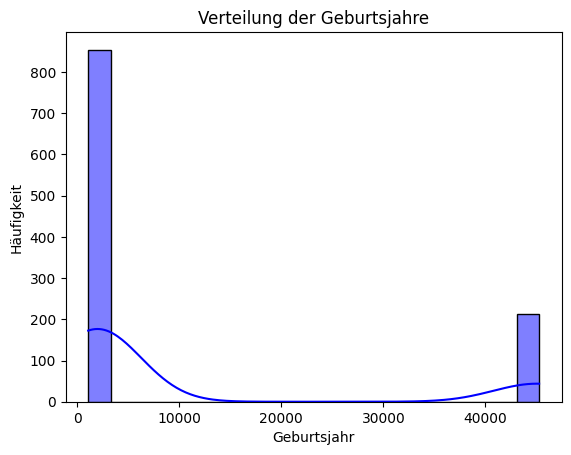

In [21]:
#visualisierung
sns.histplot(data=data, x='Geburtsjahr', bins=20, color='blue', kde=True)
plt.xlabel('Geburtsjahr')
plt.ylabel('Häufigkeit')
plt.title('Verteilung der Geburtsjahre')
plt.show()

##### dealing with outliers - imputation of outliers with the median geburtsjahr (median is not influenced by outliers)

In [22]:
# Filtern Sie Zeilen mit Geburtsjahr über 2006
data_filtered = data[data['Geburtsjahr'] <= 2006]
# Jetzt enthält df_filtered nur die Zeilen mit Geburtsjahr 2006 und darunter
data_filtered

,ID,Source,Schulabschluss,Interesse,SQL,Erfolgreich abgeschlossen,AV hat abgelehnt,Geburtsjahr,Geschlecht,Ausbildung,Berufserfahrung,Eignung,Alter
0,667051.0,tt,(Fach-) Abitur,ja,1,0,0,1976.0,Weiblich,Keine abgeschlossene Berufsausbildung,0-2 Jahre,"76,8",47
3,666953.0,tt,Abgeschlossene Berufsausbildung,ja,1,0,0,1976.0,Weiblich,Keine abgeschlossene Berufsausbildung,0-2 Jahre,"76,8",47
6,662851.0,fb,abgeschlossene berufsausbildung,ja,0,0,0,1978.0,Männlich,Keine abgeschlossene Berufsausbildung,3-5 Jahre,"90,2",45
21,665001.0,ig,hauptschule,ja,0,0,0,1997.0,Männlich,Bachelor,3-5 Jahre,"82,2",26
23,665351.0,fb,bachelor,ja,1,0,0,1959.0,Männlich,Promotion (d.h. Dr. Titel oder PhD),10-15 Jahre,"75,8",64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8849,1503901.0,ig,(fach-)_abitur,ja,1,0,0,1974.0,Männlich,Keine abgeschlossene Berufsausbildung,10-15 Jahre,test,49
8850,1498151.0,ig,hauptschule,ja,0,0,0,1974.0,Männlich,Keine abgeschlossene Berufsausbildung,10-15 Jahre,test,49
8984,1014901.0,fb,hauptschule,ja,1,0,0,1994.0,Weiblich,Keine abgeschlossene Berufsausbildung,16-20 Jahre,"81,2",29
9823,326651.0,fb,(erweitert)_realschule,ja,1,0,0,1974.0,Männlich,Keine abgeschlossene Berufsausbildung,3-5 Jahre,"82,8",49


In [23]:
1-(854/1066)
#es sind 19,88% der Werte nicht korrekt dargestellt. 
#aus dem Grund möchte ich die Werte mit dem Mittelwert ersetzen. 

0.198874296435272

In [24]:
# Berechnen des Mittelwertes der korrekten Geburtsjahre(unter oder gleich 2006)
median_birth_year = data[data['Geburtsjahr'] <= 2006]['Geburtsjahr'].median()

# Ersetzen der Geburtsjahre über 2006 im original data durch den Mittelwert
data.loc[data['Geburtsjahr'] > 2006, 'Geburtsjahr'] = median_birth_year

# Jetzt wurden die Werte über 2006 durch den Mittelwert ersetzt und wir können wieder ganz normal mit data weiterarbeiten
data

,ID,Source,Schulabschluss,Interesse,SQL,Erfolgreich abgeschlossen,AV hat abgelehnt,Geburtsjahr,Geschlecht,Ausbildung,Berufserfahrung,Eignung,Alter
0,667051.0,tt,(Fach-) Abitur,ja,1,0,0,1976.0,Weiblich,Keine abgeschlossene Berufsausbildung,0-2 Jahre,"76,8",47
3,666953.0,tt,Abgeschlossene Berufsausbildung,ja,1,0,0,1976.0,Weiblich,Keine abgeschlossene Berufsausbildung,0-2 Jahre,"76,8",47
6,662851.0,fb,abgeschlossene berufsausbildung,ja,0,0,0,1978.0,Männlich,Keine abgeschlossene Berufsausbildung,3-5 Jahre,"90,2",45
21,665001.0,ig,hauptschule,ja,0,0,0,1997.0,Männlich,Bachelor,3-5 Jahre,"82,2",26
23,665351.0,fb,bachelor,ja,1,0,0,1959.0,Männlich,Promotion (d.h. Dr. Titel oder PhD),10-15 Jahre,"75,8",64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9564,1580651.0,ig,hauptschule,nein,1,0,0,1981.5,Männlich,Keine abgeschlossene Berufsausbildung,6-10 Jahre,test,-43085
9565,1580801.0,fb,hauptschule,ja,1,0,0,1981.5,Männlich,Keine abgeschlossene Berufsausbildung,6-10 Jahre,test,-43085
9573,1581251.0,ig,hauptschule,ja,1,0,0,1981.5,Männlich,Keine abgeschlossene Berufsausbildung,0-2 Jahre,test,-42911
9823,326651.0,fb,(erweitert)_realschule,ja,1,0,0,1974.0,Männlich,Keine abgeschlossene Berufsausbildung,3-5 Jahre,"82,8",49


##### re-calculate alter 

In [25]:
# neues Berechnen der Spalte "Alter"
data['Alter'] = 2023 - data['Geburtsjahr'].astype(int)
data


,ID,Source,Schulabschluss,Interesse,SQL,Erfolgreich abgeschlossen,AV hat abgelehnt,Geburtsjahr,Geschlecht,Ausbildung,Berufserfahrung,Eignung,Alter
0,667051.0,tt,(Fach-) Abitur,ja,1,0,0,1976.0,Weiblich,Keine abgeschlossene Berufsausbildung,0-2 Jahre,"76,8",47
3,666953.0,tt,Abgeschlossene Berufsausbildung,ja,1,0,0,1976.0,Weiblich,Keine abgeschlossene Berufsausbildung,0-2 Jahre,"76,8",47
6,662851.0,fb,abgeschlossene berufsausbildung,ja,0,0,0,1978.0,Männlich,Keine abgeschlossene Berufsausbildung,3-5 Jahre,"90,2",45
21,665001.0,ig,hauptschule,ja,0,0,0,1997.0,Männlich,Bachelor,3-5 Jahre,"82,2",26
23,665351.0,fb,bachelor,ja,1,0,0,1959.0,Männlich,Promotion (d.h. Dr. Titel oder PhD),10-15 Jahre,"75,8",64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9564,1580651.0,ig,hauptschule,nein,1,0,0,1981.5,Männlich,Keine abgeschlossene Berufsausbildung,6-10 Jahre,test,42
9565,1580801.0,fb,hauptschule,ja,1,0,0,1981.5,Männlich,Keine abgeschlossene Berufsausbildung,6-10 Jahre,test,42
9573,1581251.0,ig,hauptschule,ja,1,0,0,1981.5,Männlich,Keine abgeschlossene Berufsausbildung,0-2 Jahre,test,42
9823,326651.0,fb,(erweitert)_realschule,ja,1,0,0,1974.0,Männlich,Keine abgeschlossene Berufsausbildung,3-5 Jahre,"82,8",49


In [26]:
data.Alter.unique()

array([ 47,  45,  26,  64,  43,  28,  24,  60,  32,  49,  41,  58,  31,
        34,  55,  63,  40,  59,  51,  39,  36,  25,  35,  53,  33,  42,
        27,  30,  52,  50,  48,  46,  56,  54,  37,  38,  44,  23,  57,
        19,  29,  62,  18,  17,  21,  22,  20,  61, 951])

##### deleting outlier in alter

In [27]:
data = data[data['Alter'] != 951]


##### dealing with incorrect values in column eignung 

In [28]:
data.Eignung.value_counts()

Eignung
test    642
80,2     42
69       24
88,8     14
82       12
       ... 
68        1
73        1
69,4      1
68,8      1
94,6      1
Name: count, Length: 99, dtype: int64

##### incorrect values need to be imputed with median since they are too many to delete

In [29]:
# Ersetzen von 'test' in der Spalte "Eignung" durch NaN
data['Eignung'] = data['Eignung'].replace('test', np.nan)

# Konvertieren der Spalte "Eignung" in Gleitkommazahlen (float)
data['Eignung'] = data['Eignung'].str.replace(',', '.').astype(float)

# Berechnen des Medians der numerischen Werte in der Spalte "Eignung"
median_value = data['Eignung'].median()

# Ersetzen der NaN-Werte in der Spalte "Eignung" durch den Median
data['Eignung'].fillna(median_value, inplace=True)

# Überprüfen des Datentypes und die Werte selbst, weil der Typ original kein float sondern ein objekt war.
# Das war die Herausforderung hier in der richtigen Reihenfolge vorzugehen. 
print(data['Eignung'].dtype)
print(data['Eignung'])




float64
0       76.8
3       76.8
6       90.2
21      82.2
23      75.8
        ... 
9564    80.2
9565    80.2
9573    80.2
9823    82.8
9963    94.6
Name: Eignung, Length: 1063, dtype: float64


/var/folders/vx/ctc0px3x7_v2cdbtrr9l5h980000gn/T/ipykernel_5083/4125291548.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Eignung'] = data['Eignung'].replace('test', np.nan)
/var/folders/vx/ctc0px3x7_v2cdbtrr9l5h980000gn/T/ipykernel_5083/4125291548.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Eignung'] = data['Eignung'].str.replace(',', '.').astype(float)
/var/folders/vx/ctc0px3x7_v2cdbtrr9l5h980000gn/T/ipykernel_5083/4125291548.py:11: SettingWithCopyWarning: 
A value is trying to be

In [30]:
data.head()

,ID,Source,Schulabschluss,Interesse,SQL,Erfolgreich abgeschlossen,AV hat abgelehnt,Geburtsjahr,Geschlecht,Ausbildung,Berufserfahrung,Eignung,Alter
0,667051.0,tt,(Fach-) Abitur,ja,1,0,0,1976.0,Weiblich,Keine abgeschlossene Berufsausbildung,0-2 Jahre,76.8,47
3,666953.0,tt,Abgeschlossene Berufsausbildung,ja,1,0,0,1976.0,Weiblich,Keine abgeschlossene Berufsausbildung,0-2 Jahre,76.8,47
6,662851.0,fb,abgeschlossene berufsausbildung,ja,0,0,0,1978.0,Männlich,Keine abgeschlossene Berufsausbildung,3-5 Jahre,90.2,45
21,665001.0,ig,hauptschule,ja,0,0,0,1997.0,Männlich,Bachelor,3-5 Jahre,82.2,26
23,665351.0,fb,bachelor,ja,1,0,0,1959.0,Männlich,Promotion (d.h. Dr. Titel oder PhD),10-15 Jahre,75.8,64


#### casting kategorical values to numerical values
#### berufserfahrung

In [31]:
# Eindeutige Werte in Labelspalte anzeigen
unique_values = data['Berufserfahrung'].unique()
print(unique_values)

['0-2 Jahre' '3-5 Jahre' '10-15 Jahre' '6-10 Jahre' 'Mehr als 20 Jahre'
 '16-20 Jahre']


In [32]:
erfahrungs_mapping = {
    '0-2 Jahre': 1,
    '3-5 Jahre': 2,
    '6-10 Jahre': 3,
    '10-15 Jahre': 4,
    '16-20 Jahre': 5,
    'Mehr als 20 Jahre': 6
}

# Verwenden von replace(), um die Werte in der Spalte zu ersetzen und in die neue Spalte zu schreiben.
data['Berufserfahrung_Num'] = data['Berufserfahrung'].replace(erfahrungs_mapping)

# Jetzt enthält die Spalte "Berufserfahrung_Num" numerische Werte
data


/var/folders/vx/ctc0px3x7_v2cdbtrr9l5h980000gn/T/ipykernel_5083/2875492140.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Berufserfahrung_Num'] = data['Berufserfahrung'].replace(erfahrungs_mapping)


,ID,Source,Schulabschluss,Interesse,SQL,Erfolgreich abgeschlossen,AV hat abgelehnt,Geburtsjahr,Geschlecht,Ausbildung,Berufserfahrung,Eignung,Alter,Berufserfahrung_Num
0,667051.0,tt,(Fach-) Abitur,ja,1,0,0,1976.0,Weiblich,Keine abgeschlossene Berufsausbildung,0-2 Jahre,76.8,47,1
3,666953.0,tt,Abgeschlossene Berufsausbildung,ja,1,0,0,1976.0,Weiblich,Keine abgeschlossene Berufsausbildung,0-2 Jahre,76.8,47,1
6,662851.0,fb,abgeschlossene berufsausbildung,ja,0,0,0,1978.0,Männlich,Keine abgeschlossene Berufsausbildung,3-5 Jahre,90.2,45,2
21,665001.0,ig,hauptschule,ja,0,0,0,1997.0,Männlich,Bachelor,3-5 Jahre,82.2,26,2
23,665351.0,fb,bachelor,ja,1,0,0,1959.0,Männlich,Promotion (d.h. Dr. Titel oder PhD),10-15 Jahre,75.8,64,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9564,1580651.0,ig,hauptschule,nein,1,0,0,1981.5,Männlich,Keine abgeschlossene Berufsausbildung,6-10 Jahre,80.2,42,3
9565,1580801.0,fb,hauptschule,ja,1,0,0,1981.5,Männlich,Keine abgeschlossene Berufsausbildung,6-10 Jahre,80.2,42,3
9573,1581251.0,ig,hauptschule,ja,1,0,0,1981.5,Männlich,Keine abgeschlossene Berufsausbildung,0-2 Jahre,80.2,42,1
9823,326651.0,fb,(erweitert)_realschule,ja,1,0,0,1974.0,Männlich,Keine abgeschlossene Berufsausbildung,3-5 Jahre,82.8,49,2


##### schulabschluss 

In [33]:
data.Schulabschluss.unique()

array(['(Fach-) Abitur', 'Abgeschlossene Berufsausbildung',
       'abgeschlossene berufsausbildung', 'hauptschule', 'bachelor',
       '(fach-) abitur', '(erweitert) realschule',
       'Abgeschlossene Berufsausbilung', 'Bachelor',
       '(Erweitert) Realschule', 'Hauptschule', 'Master (oder höher)',
       '(Erweiterte) Realschule', 'abgeschlossene_berufsausbildung',
       '(erweitert)_realschule', '(fach-)_abitur'], dtype=object)

In [34]:
schulabschluss_mapping = {
    '(Fach-) Abitur': 4,
    'Abgeschlossene Berufsausbildung': 3,
    'abgeschlossene berufsausbildung': 3,
    'hauptschule': 1,
    'bachelor': 5,
    '(fach-) abitur': 4,
    '(erweitert) realschule': 2,
    'Abgeschlossene Berufsausbilung': 3,
    'Bachelor': 5,
    '(Erweitert) Realschule': 2,
    'Hauptschule': 1,
    'Master (oder höher)': 6,
    '(Erweiterte) Realschule': 2,
    'abgeschlossene_berufsausbildung': 3,
    '(erweitert)_realschule': 2,
    '(fach-)_abitur': 4
}

# Verwenden von replace(), um die Werte in der Spalte zu ersetzen und in die neue Spalte zu schreiben.
data['Schulabschluss_Num'] = data['Schulabschluss'].replace(schulabschluss_mapping)

# Jetzt enthält die Spalte "Schulabschluss_Num" numerische Werte
data


/var/folders/vx/ctc0px3x7_v2cdbtrr9l5h980000gn/T/ipykernel_5083/2490109773.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Schulabschluss_Num'] = data['Schulabschluss'].replace(schulabschluss_mapping)


,ID,Source,Schulabschluss,Interesse,SQL,Erfolgreich abgeschlossen,AV hat abgelehnt,Geburtsjahr,Geschlecht,Ausbildung,Berufserfahrung,Eignung,Alter,Berufserfahrung_Num,Schulabschluss_Num
0,667051.0,tt,(Fach-) Abitur,ja,1,0,0,1976.0,Weiblich,Keine abgeschlossene Berufsausbildung,0-2 Jahre,76.8,47,1,4
3,666953.0,tt,Abgeschlossene Berufsausbildung,ja,1,0,0,1976.0,Weiblich,Keine abgeschlossene Berufsausbildung,0-2 Jahre,76.8,47,1,3
6,662851.0,fb,abgeschlossene berufsausbildung,ja,0,0,0,1978.0,Männlich,Keine abgeschlossene Berufsausbildung,3-5 Jahre,90.2,45,2,3
21,665001.0,ig,hauptschule,ja,0,0,0,1997.0,Männlich,Bachelor,3-5 Jahre,82.2,26,2,1
23,665351.0,fb,bachelor,ja,1,0,0,1959.0,Männlich,Promotion (d.h. Dr. Titel oder PhD),10-15 Jahre,75.8,64,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9564,1580651.0,ig,hauptschule,nein,1,0,0,1981.5,Männlich,Keine abgeschlossene Berufsausbildung,6-10 Jahre,80.2,42,3,1
9565,1580801.0,fb,hauptschule,ja,1,0,0,1981.5,Männlich,Keine abgeschlossene Berufsausbildung,6-10 Jahre,80.2,42,3,1
9573,1581251.0,ig,hauptschule,ja,1,0,0,1981.5,Männlich,Keine abgeschlossene Berufsausbildung,0-2 Jahre,80.2,42,1,1
9823,326651.0,fb,(erweitert)_realschule,ja,1,0,0,1974.0,Männlich,Keine abgeschlossene Berufsausbildung,3-5 Jahre,82.8,49,2,2


##### ausbildung

In [35]:
data.Ausbildung.unique()

array(['Keine abgeschlossene Berufsausbildung', 'Bachelor',
       'Promotion (d.h. Dr. Titel oder PhD)',
       'Meister / Techniker, gleichwertiger Fachabschluss',
       'Anerkannte Berufsausbildung',
       'Master / Diplom / Magister / Staatsexmen'], dtype=object)

In [36]:
ausbildung_mapping = {
    'Keine abgeschlossene Berufsausbildung': 1,
    'Bachelor': 4,
    'Promotion (d.h. Dr. Titel oder PhD)': 6,
    'Meister / Techniker, gleichwertiger Fachabschluss': 3,
    'Anerkannte Berufsausbildung': 2,
    'Master / Diplom / Magister / Staatsexmen': 5
}

# Verwenden von replace(), um die Werte in der Spalte zu ersetzen und in die neue Spalte zu schreiben.
data['Ausbildung_Num'] = data['Ausbildung'].replace(ausbildung_mapping)

# Jetzt enthält die Spalte "Ausbildung_Num" numerische Werte
data


/var/folders/vx/ctc0px3x7_v2cdbtrr9l5h980000gn/T/ipykernel_5083/1703407570.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Ausbildung_Num'] = data['Ausbildung'].replace(ausbildung_mapping)


,ID,Source,Schulabschluss,Interesse,SQL,Erfolgreich abgeschlossen,AV hat abgelehnt,Geburtsjahr,Geschlecht,Ausbildung,Berufserfahrung,Eignung,Alter,Berufserfahrung_Num,Schulabschluss_Num,Ausbildung_Num
0,667051.0,tt,(Fach-) Abitur,ja,1,0,0,1976.0,Weiblich,Keine abgeschlossene Berufsausbildung,0-2 Jahre,76.8,47,1,4,1
3,666953.0,tt,Abgeschlossene Berufsausbildung,ja,1,0,0,1976.0,Weiblich,Keine abgeschlossene Berufsausbildung,0-2 Jahre,76.8,47,1,3,1
6,662851.0,fb,abgeschlossene berufsausbildung,ja,0,0,0,1978.0,Männlich,Keine abgeschlossene Berufsausbildung,3-5 Jahre,90.2,45,2,3,1
21,665001.0,ig,hauptschule,ja,0,0,0,1997.0,Männlich,Bachelor,3-5 Jahre,82.2,26,2,1,4
23,665351.0,fb,bachelor,ja,1,0,0,1959.0,Männlich,Promotion (d.h. Dr. Titel oder PhD),10-15 Jahre,75.8,64,4,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9564,1580651.0,ig,hauptschule,nein,1,0,0,1981.5,Männlich,Keine abgeschlossene Berufsausbildung,6-10 Jahre,80.2,42,3,1,1
9565,1580801.0,fb,hauptschule,ja,1,0,0,1981.5,Männlich,Keine abgeschlossene Berufsausbildung,6-10 Jahre,80.2,42,3,1,1
9573,1581251.0,ig,hauptschule,ja,1,0,0,1981.5,Männlich,Keine abgeschlossene Berufsausbildung,0-2 Jahre,80.2,42,1,1,1
9823,326651.0,fb,(erweitert)_realschule,ja,1,0,0,1974.0,Männlich,Keine abgeschlossene Berufsausbildung,3-5 Jahre,82.8,49,2,2,1


##### interesse


In [37]:
interesse_mapping = {
    'ja': 1,
    'nein': 0
}

# Verwenden von replace(), um die Werte in der Spalte "Interesse" zu ersetzen und in die neue Spalte zu schreiben
data['Interesse_Num'] = data['Interesse'].replace(interesse_mapping)

# Jetzt enthält die Spalte "Interesse_Num" numerische Werte (1 für ja und 0 für nein)
data


/var/folders/vx/ctc0px3x7_v2cdbtrr9l5h980000gn/T/ipykernel_5083/2651226507.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Interesse_Num'] = data['Interesse'].replace(interesse_mapping)


,ID,Source,Schulabschluss,Interesse,SQL,Erfolgreich abgeschlossen,AV hat abgelehnt,Geburtsjahr,Geschlecht,Ausbildung,Berufserfahrung,Eignung,Alter,Berufserfahrung_Num,Schulabschluss_Num,Ausbildung_Num,Interesse_Num
0,667051.0,tt,(Fach-) Abitur,ja,1,0,0,1976.0,Weiblich,Keine abgeschlossene Berufsausbildung,0-2 Jahre,76.8,47,1,4,1,1
3,666953.0,tt,Abgeschlossene Berufsausbildung,ja,1,0,0,1976.0,Weiblich,Keine abgeschlossene Berufsausbildung,0-2 Jahre,76.8,47,1,3,1,1
6,662851.0,fb,abgeschlossene berufsausbildung,ja,0,0,0,1978.0,Männlich,Keine abgeschlossene Berufsausbildung,3-5 Jahre,90.2,45,2,3,1,1
21,665001.0,ig,hauptschule,ja,0,0,0,1997.0,Männlich,Bachelor,3-5 Jahre,82.2,26,2,1,4,1
23,665351.0,fb,bachelor,ja,1,0,0,1959.0,Männlich,Promotion (d.h. Dr. Titel oder PhD),10-15 Jahre,75.8,64,4,5,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9564,1580651.0,ig,hauptschule,nein,1,0,0,1981.5,Männlich,Keine abgeschlossene Berufsausbildung,6-10 Jahre,80.2,42,3,1,1,0
9565,1580801.0,fb,hauptschule,ja,1,0,0,1981.5,Männlich,Keine abgeschlossene Berufsausbildung,6-10 Jahre,80.2,42,3,1,1,1
9573,1581251.0,ig,hauptschule,ja,1,0,0,1981.5,Männlich,Keine abgeschlossene Berufsausbildung,0-2 Jahre,80.2,42,1,1,1,1
9823,326651.0,fb,(erweitert)_realschule,ja,1,0,0,1974.0,Männlich,Keine abgeschlossene Berufsausbildung,3-5 Jahre,82.8,49,2,2,1,1


##### geschlecht

In [38]:
data.Geschlecht.unique()

array(['Weiblich', 'Männlich', 'Divers'], dtype=object)

In [39]:
data.Geschlecht.value_counts()

Geschlecht
Männlich    864
Weiblich    194
Divers        5
Name: count, dtype: int64

##### dropping 'divers' so I can cast geschlecht to a binary categorical value

In [40]:
data = data[data['Geschlecht'] != 'Divers']
data

,ID,Source,Schulabschluss,Interesse,SQL,Erfolgreich abgeschlossen,AV hat abgelehnt,Geburtsjahr,Geschlecht,Ausbildung,Berufserfahrung,Eignung,Alter,Berufserfahrung_Num,Schulabschluss_Num,Ausbildung_Num,Interesse_Num
0,667051.0,tt,(Fach-) Abitur,ja,1,0,0,1976.0,Weiblich,Keine abgeschlossene Berufsausbildung,0-2 Jahre,76.8,47,1,4,1,1
3,666953.0,tt,Abgeschlossene Berufsausbildung,ja,1,0,0,1976.0,Weiblich,Keine abgeschlossene Berufsausbildung,0-2 Jahre,76.8,47,1,3,1,1
6,662851.0,fb,abgeschlossene berufsausbildung,ja,0,0,0,1978.0,Männlich,Keine abgeschlossene Berufsausbildung,3-5 Jahre,90.2,45,2,3,1,1
21,665001.0,ig,hauptschule,ja,0,0,0,1997.0,Männlich,Bachelor,3-5 Jahre,82.2,26,2,1,4,1
23,665351.0,fb,bachelor,ja,1,0,0,1959.0,Männlich,Promotion (d.h. Dr. Titel oder PhD),10-15 Jahre,75.8,64,4,5,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9564,1580651.0,ig,hauptschule,nein,1,0,0,1981.5,Männlich,Keine abgeschlossene Berufsausbildung,6-10 Jahre,80.2,42,3,1,1,0
9565,1580801.0,fb,hauptschule,ja,1,0,0,1981.5,Männlich,Keine abgeschlossene Berufsausbildung,6-10 Jahre,80.2,42,3,1,1,1
9573,1581251.0,ig,hauptschule,ja,1,0,0,1981.5,Männlich,Keine abgeschlossene Berufsausbildung,0-2 Jahre,80.2,42,1,1,1,1
9823,326651.0,fb,(erweitert)_realschule,ja,1,0,0,1974.0,Männlich,Keine abgeschlossene Berufsausbildung,3-5 Jahre,82.8,49,2,2,1,1


#### casting geschlecht 

In [41]:
data.loc[:, 'Geschlecht_Num'] = data['Geschlecht'].replace({'Weiblich': 0, 'Männlich': 1})
data


/var/folders/vx/ctc0px3x7_v2cdbtrr9l5h980000gn/T/ipykernel_5083/2847064853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'Geschlecht_Num'] = data['Geschlecht'].replace({'Weiblich': 0, 'Männlich': 1})


,ID,Source,Schulabschluss,Interesse,SQL,Erfolgreich abgeschlossen,AV hat abgelehnt,Geburtsjahr,Geschlecht,Ausbildung,Berufserfahrung,Eignung,Alter,Berufserfahrung_Num,Schulabschluss_Num,Ausbildung_Num,Interesse_Num,Geschlecht_Num
0,667051.0,tt,(Fach-) Abitur,ja,1,0,0,1976.0,Weiblich,Keine abgeschlossene Berufsausbildung,0-2 Jahre,76.8,47,1,4,1,1,0
3,666953.0,tt,Abgeschlossene Berufsausbildung,ja,1,0,0,1976.0,Weiblich,Keine abgeschlossene Berufsausbildung,0-2 Jahre,76.8,47,1,3,1,1,0
6,662851.0,fb,abgeschlossene berufsausbildung,ja,0,0,0,1978.0,Männlich,Keine abgeschlossene Berufsausbildung,3-5 Jahre,90.2,45,2,3,1,1,1
21,665001.0,ig,hauptschule,ja,0,0,0,1997.0,Männlich,Bachelor,3-5 Jahre,82.2,26,2,1,4,1,1
23,665351.0,fb,bachelor,ja,1,0,0,1959.0,Männlich,Promotion (d.h. Dr. Titel oder PhD),10-15 Jahre,75.8,64,4,5,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9564,1580651.0,ig,hauptschule,nein,1,0,0,1981.5,Männlich,Keine abgeschlossene Berufsausbildung,6-10 Jahre,80.2,42,3,1,1,0,1
9565,1580801.0,fb,hauptschule,ja,1,0,0,1981.5,Männlich,Keine abgeschlossene Berufsausbildung,6-10 Jahre,80.2,42,3,1,1,1,1
9573,1581251.0,ig,hauptschule,ja,1,0,0,1981.5,Männlich,Keine abgeschlossene Berufsausbildung,0-2 Jahre,80.2,42,1,1,1,1,1
9823,326651.0,fb,(erweitert)_realschule,ja,1,0,0,1974.0,Männlich,Keine abgeschlossene Berufsausbildung,3-5 Jahre,82.8,49,2,2,1,1,1


In [42]:
data.Source.unique()

array(['tt', 'fb', 'ig'], dtype=object)

##### casting "source" using dummy variables since there are three variables and there is no ranking amongst these sources such as in berufserfahrung, where replace was fine



In [43]:
# Erzeugen der Dummy-Variablen
dummies=pd.get_dummies(data['Source'])
# Umwandeln in numerische Werte (0 und 1)
source_numeric=dummies.astype(int)
# Hinzufügen der numerischen Spalten zum ursprünglichen DataFrame
data = pd.concat([data,source_numeric], axis=1)
# Anzeige des aktualisierten DataFrames
data

,ID,Source,Schulabschluss,Interesse,SQL,Erfolgreich abgeschlossen,AV hat abgelehnt,Geburtsjahr,Geschlecht,Ausbildung,...,Eignung,Alter,Berufserfahrung_Num,Schulabschluss_Num,Ausbildung_Num,Interesse_Num,Geschlecht_Num,fb,ig,tt
0,667051.0,tt,(Fach-) Abitur,ja,1,0,0,1976.0,Weiblich,Keine abgeschlossene Berufsausbildung,...,76.8,47,1,4,1,1,0,0,0,1
3,666953.0,tt,Abgeschlossene Berufsausbildung,ja,1,0,0,1976.0,Weiblich,Keine abgeschlossene Berufsausbildung,...,76.8,47,1,3,1,1,0,0,0,1
6,662851.0,fb,abgeschlossene berufsausbildung,ja,0,0,0,1978.0,Männlich,Keine abgeschlossene Berufsausbildung,...,90.2,45,2,3,1,1,1,1,0,0
21,665001.0,ig,hauptschule,ja,0,0,0,1997.0,Männlich,Bachelor,...,82.2,26,2,1,4,1,1,0,1,0
23,665351.0,fb,bachelor,ja,1,0,0,1959.0,Männlich,Promotion (d.h. Dr. Titel oder PhD),...,75.8,64,4,5,6,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9564,1580651.0,ig,hauptschule,nein,1,0,0,1981.5,Männlich,Keine abgeschlossene Berufsausbildung,...,80.2,42,3,1,1,0,1,0,1,0
9565,1580801.0,fb,hauptschule,ja,1,0,0,1981.5,Männlich,Keine abgeschlossene Berufsausbildung,...,80.2,42,3,1,1,1,1,1,0,0
9573,1581251.0,ig,hauptschule,ja,1,0,0,1981.5,Männlich,Keine abgeschlossene Berufsausbildung,...,80.2,42,1,1,1,1,1,0,1,0
9823,326651.0,fb,(erweitert)_realschule,ja,1,0,0,1974.0,Männlich,Keine abgeschlossene Berufsausbildung,...,82.8,49,2,2,1,1,1,1,0,0


In [44]:
data.isna().sum()

ID                           0
Source                       0
Schulabschluss               0
Interesse                    0
SQL                          0
Erfolgreich abgeschlossen    0
AV hat abgelehnt             0
Geburtsjahr                  0
Geschlecht                   0
Ausbildung                   0
Berufserfahrung              0
Eignung                      0
Alter                        0
Berufserfahrung_Num          0
Schulabschluss_Num           0
Ausbildung_Num               0
Interesse_Num                0
Geschlecht_Num               0
fb                           0
ig                           0
tt                           0
dtype: int64

#### visualisation of some cleaned data to see the distribution (most of the cleaned data is only 1 and 0 and i am not doing a pure exploratory data analysis)

##### distribution of eignung

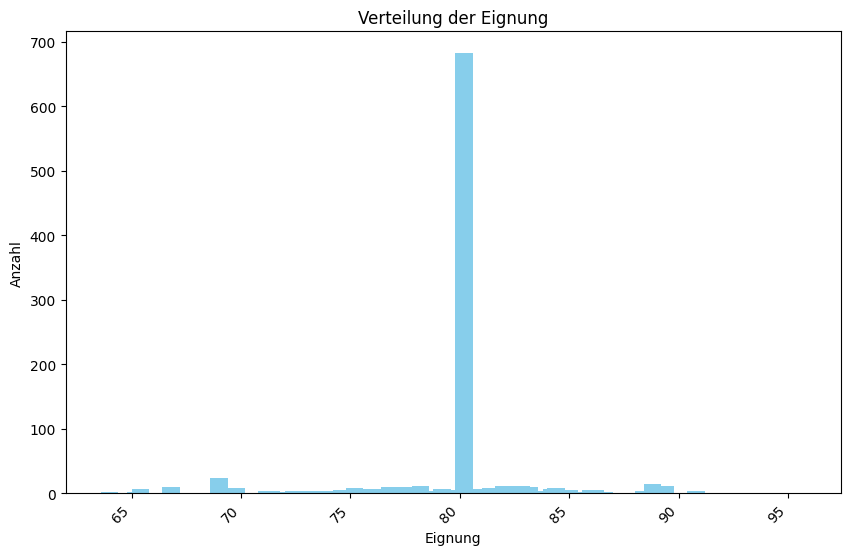

In [45]:
eignung_counts = data.Eignung.value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(eignung_counts.index, eignung_counts.values, color='skyblue')
plt.xlabel('Eignung')
plt.ylabel('Anzahl')
plt.title('Verteilung der Eignung')
plt.xticks(rotation=45, ha="right")
plt.show()

##### distribution of schulabschluss, ausbildung and berufserfahrung

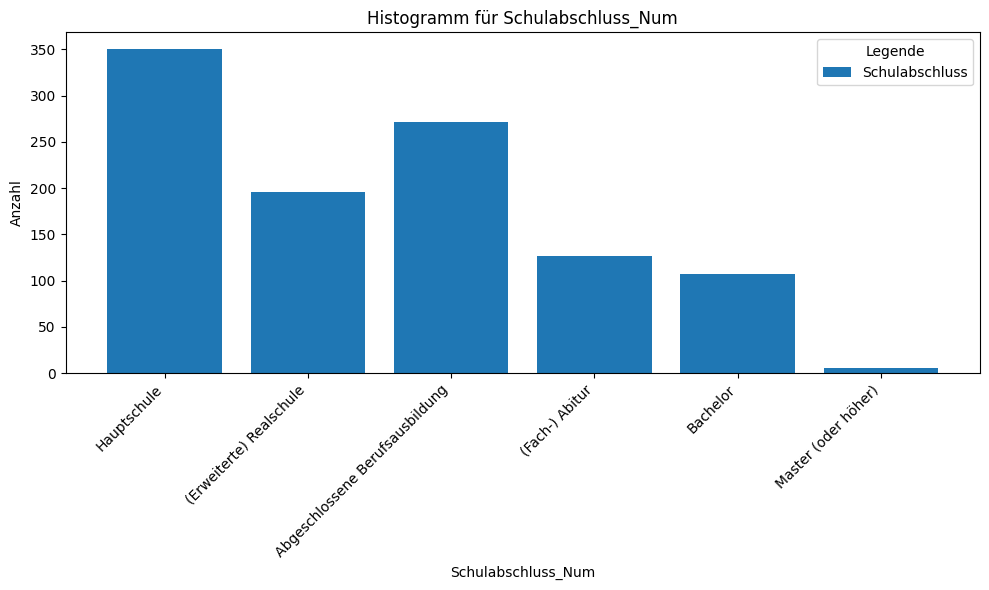

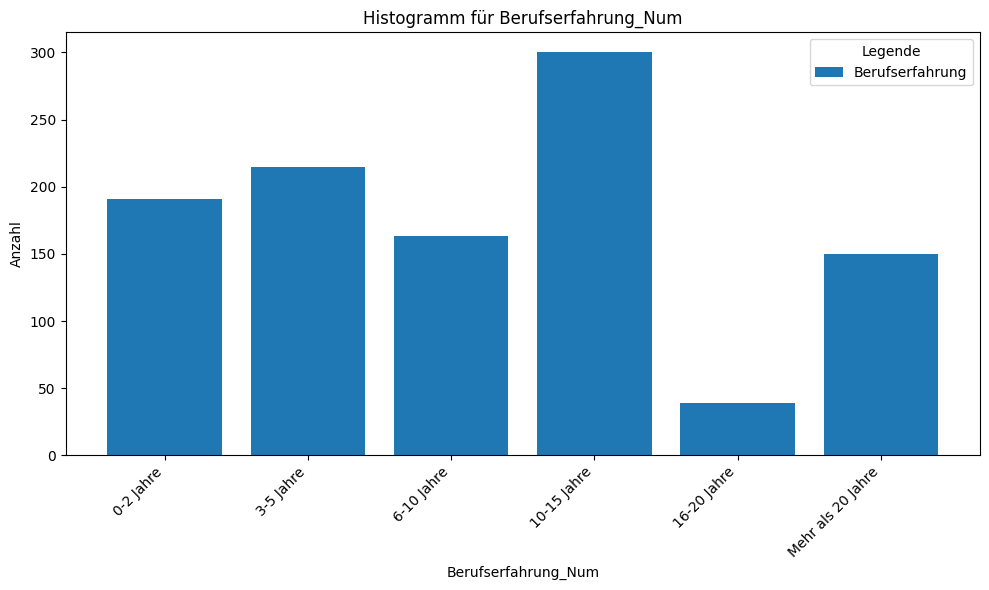

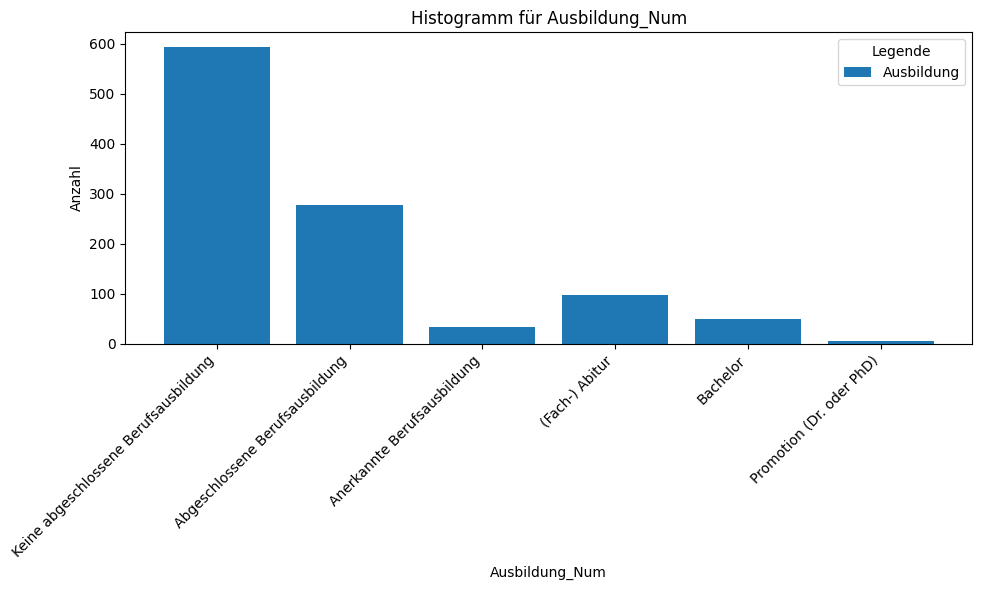

In [46]:

# Eindeutige Kategorien für den Schulabschluss
unique_schulabschluss = {
    1: 'Hauptschule',
    2: '(Erweiterte) Realschule',
    3: 'Abgeschlossene Berufsausbildung',
    4: '(Fach-) Abitur',
    5: 'Bachelor',
    6: 'Master (oder höher)'
}

# Eindeutige Kategorien für die Berufserfahrung
erfahrungs_mapping = {
    1: '0-2 Jahre',
    2: '3-5 Jahre',
    3: '6-10 Jahre',
    4: '10-15 Jahre',
    5: '16-20 Jahre',
    6: 'Mehr als 20 Jahre'
}

# Eindeutige Kategorien für die Ausbildung
ausbildung_mapping = {
    1: 'Keine abgeschlossene Berufsausbildung',
    2: 'Abgeschlossene Berufsausbildung',
    3: 'Anerkannte Berufsausbildung',
    4: '(Fach-) Abitur',
    5: 'Bachelor',
    6: 'Promotion (Dr. oder PhD)'
}

# Bereinigen Sie die Daten für Schulabschluss und Berufserfahrung
data['Schulabschluss_Num'] = data['Schulabschluss_Num'].replace({
    'abgeschlossene berufsausbildung': 'Abgeschlossene Berufsausbildung',
    'abgeschlossene_berufsausbildung': 'Abgeschlossene Berufsausbildung',
    '(erweitert) realschule': '(Erweiterte) Realschule',
    '(erweitert)_realschule': '(Erweiterte) Realschule',
    '(fach-) abitur': '(Fach-) Abitur',
    '(fach-)_abitur': '(Fach-) Abitur',
    'bachelor': 'Bachelor'
})

# Sortieren Sie die Daten nach den Kategorien
schulabschluss_counts = data['Schulabschluss_Num'].value_counts().sort_index()
berufserfahrung_counts = data['Berufserfahrung_Num'].value_counts().sort_index()
ausbildung_counts = data['Ausbildung_Num'].value_counts().sort_index()

# Diagramm für Schulabschluss_Num
plt.figure(figsize=(10, 6))
plt.bar([unique_schulabschluss[k] for k in schulabschluss_counts.index], schulabschluss_counts.values)
plt.xticks(rotation=45, ha="right")
plt.xlabel('Schulabschluss_Num')
plt.ylabel('Anzahl')
plt.title('Histogramm für Schulabschluss_Num')
plt.legend(['Schulabschluss'], title='Legende')
plt.tight_layout()
plt.show()

# Diagramm für Berufserfahrung_Num
plt.figure(figsize=(10, 6))
plt.bar([erfahrungs_mapping[k] for k in berufserfahrung_counts.index], berufserfahrung_counts.values)
plt.xticks(rotation=45, ha="right")
plt.xlabel('Berufserfahrung_Num')
plt.ylabel('Anzahl')
plt.title('Histogramm für Berufserfahrung_Num')
plt.legend(['Berufserfahrung'], title='Legende')
plt.tight_layout()
plt.show()

# Diagramm für Ausbildung_Num
plt.figure(figsize=(10, 6))
plt.bar([ausbildung_mapping[k] for k in ausbildung_counts.index], ausbildung_counts.values)
plt.xticks(rotation=45, ha="right")
plt.xlabel('Ausbildung_Num')
plt.ylabel('Anzahl')
plt.title('Histogramm für Ausbildung_Num')
plt.legend(['Ausbildung'], title='Legende')
plt.tight_layout()
plt.show()


### MACHINE LEARNING
#### unsupervised learning: k-means-clustering
K-Means ist ein unüberwachter Clustering-Algorithmus in der maschinellen Datenanalyse. Ziel des K-Means-Algorithmus ist es, ähnliche Datenpunkte in Gruppen, sogenannten Clustern, zu gruppieren. Dabei wird versucht, die Daten so aufzuteilen, dass ähnliche Datenpunkte im selben Cluster liegen und unterschiedliche Datenpunkte in verschiedenen Clustern landen.

**Funktionsweise:**
1. Der Algorithmus beginnt mit der Auswahl einer vordefinierten Anzahl von Clustern, die als 'K' bezeichnet werden.

2. Zufällige Datenpunkte werden als Initiale Clusterzentren ausgewählt.

3. Jeder Datenpunkt wird dem Cluster mit dem nächstgelegenen Clusterzentrum zugewiesen.

4. Die Mittelwerte der Datenpunkte in jedem Cluster werden berechnet, um neue Clusterzentren zu bilden.

5. Schritte 3 und 4 werden wiederholt, bis sich die Clusterzentren nicht mehr ändern oder ein vordefiniertes Abbruchkriterium erfüllt ist.

**Anwendungen:**
K-Means wird in verschiedenen Bereichen eingesetzt, einschließlich:

- Bildsegmentierung
- Kundenclustering im Marketing
- Genexpressionsanalyse in der Bioinformatik
- Anomalieerkennung in der Cybersecurity

**Hinweis:** K-Means ist ein unüberwachter Algorithmus und wird für das Clustering verwendet, nicht für die Klassifikation von Datenpunkten in vordefinierte Klassen oder Kategorien.


##### feature selection for model

In [47]:
#ich wähle nur die numerischen features aus
selected_features = ['Berufserfahrung_Num', 'Schulabschluss_Num', 'Ausbildung_Num', 'Interesse_Num','Eignung', 'Alter', 'SQL', 'Geschlecht_Num', 'fb', 'ig','tt'] 
X = data[selected_features]  

In [48]:
X

,Berufserfahrung_Num,Schulabschluss_Num,Ausbildung_Num,Interesse_Num,Eignung,Alter,SQL,Geschlecht_Num,fb,ig,tt
0,1,4,1,1,76.8,47,1,0,0,0,1
3,1,3,1,1,76.8,47,1,0,0,0,1
6,2,3,1,1,90.2,45,0,1,1,0,0
21,2,1,4,1,82.2,26,0,1,0,1,0
23,4,5,6,1,75.8,64,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9564,3,1,1,0,80.2,42,1,1,0,1,0
9565,3,1,1,1,80.2,42,1,1,1,0,0
9573,1,1,1,1,80.2,42,1,1,0,1,0
9823,2,2,1,1,82.8,49,1,1,1,0,0


##### scaling the features since k-means requires scaling for adequacy

In [49]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0. , 0.6, 0. , ..., 0. , 0. , 1. ],
       [0. , 0.4, 0. , ..., 0. , 0. , 1. ],
       [0.2, 0.4, 0. , ..., 1. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 1. , 0. ],
       [0.2, 0.2, 0. , ..., 1. , 0. , 0. ],
       [1. , 0.4, 0.2, ..., 0. , 1. , 0. ]])

##### using inertia to find out how many clusters in my model are best

Text(0.5, 0, 'Anzahl der Cluster')

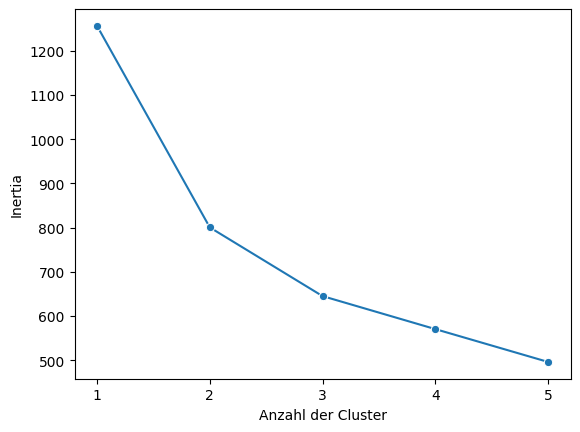

In [50]:
inertia = []

for i in range(1,6):
    km = sk_cluster.KMeans(n_clusters=i, n_init=10)
    km.fit(X=X)
    inertia.append(km.inertia_)
    
sns.lineplot(x=range(1,6), y=inertia, marker="o")
plt.xticks(range(1,6))
plt.ylabel("Inertia")
plt.xlabel("Anzahl der Cluster")    

##### applying model with optimal number of clusters -- here: two

In [51]:
model_kmeans = sk_cluster.KMeans(n_clusters=2, n_init=10)
model_kmeans.fit(X)
data.loc[:, 'klassen'] = model_kmeans.predict(X)
data['klassen']

0       0
3       0
6       0
21      1
23      0
       ..
9564    1
9565    0
9573    1
9823    0
9963    1
Name: klassen, Length: 1058, dtype: int32

##### visualisation of the two classes and each feature to determine whether there are any differences between those

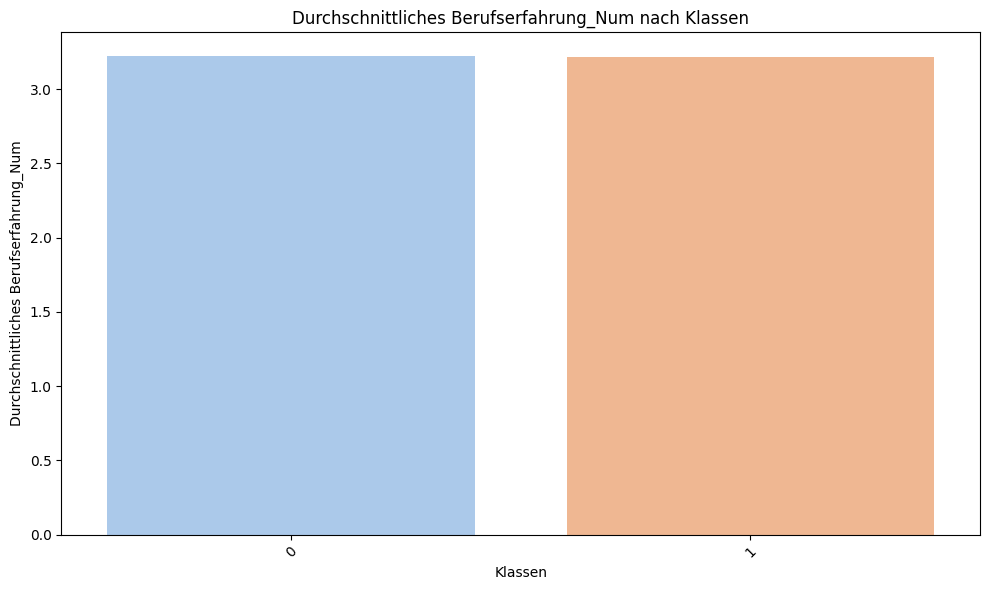

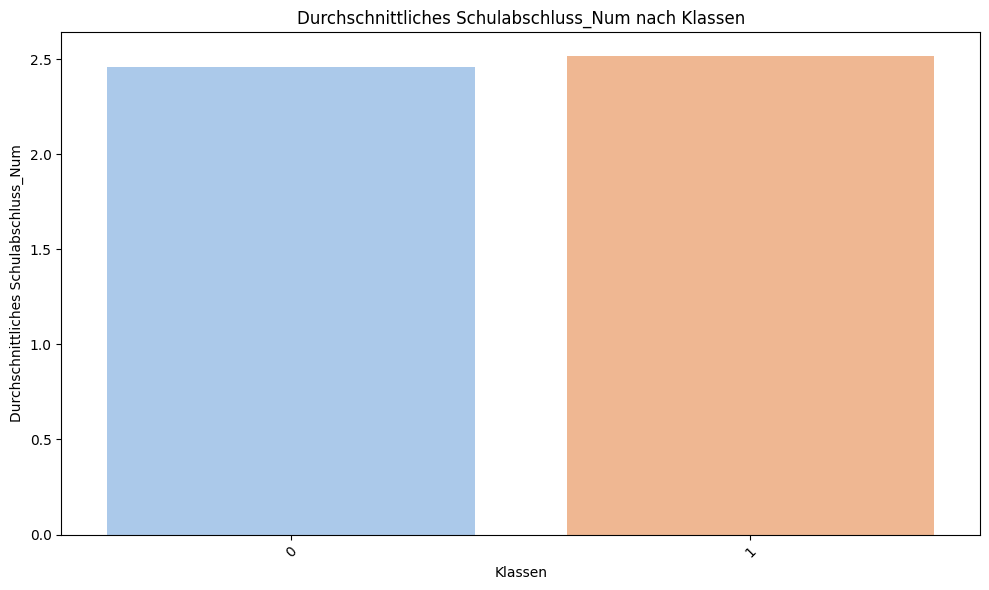

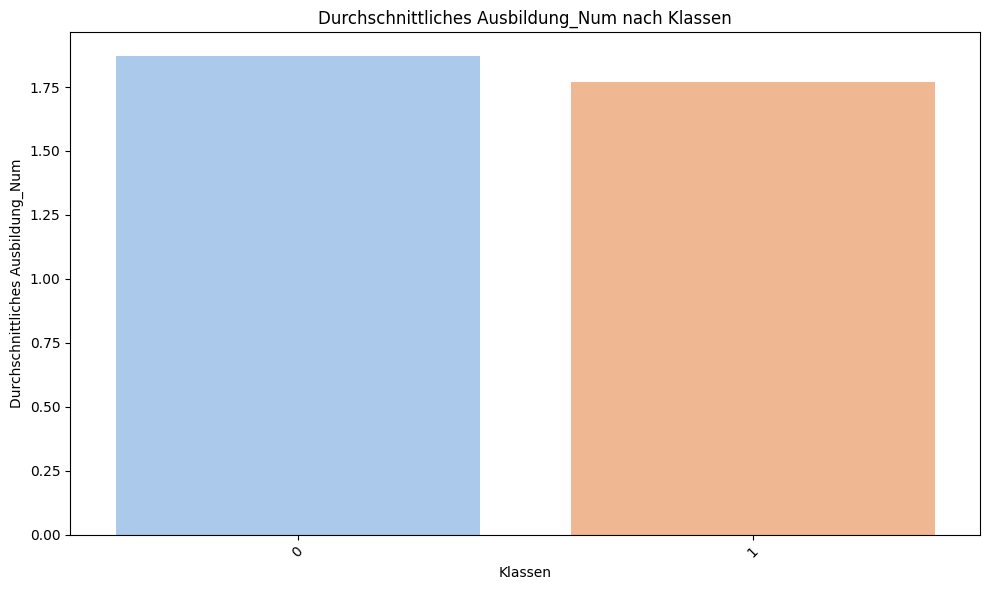

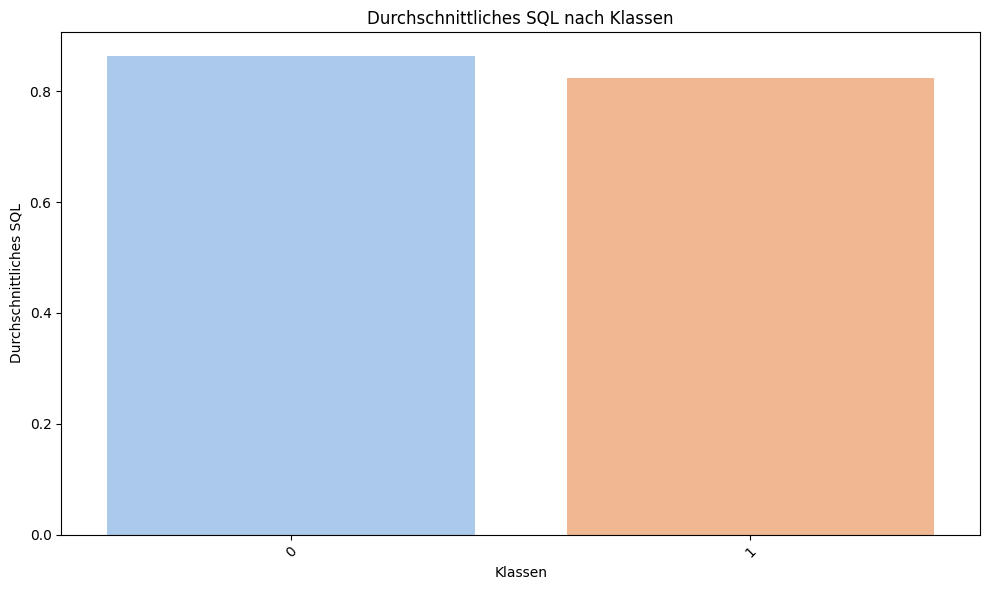

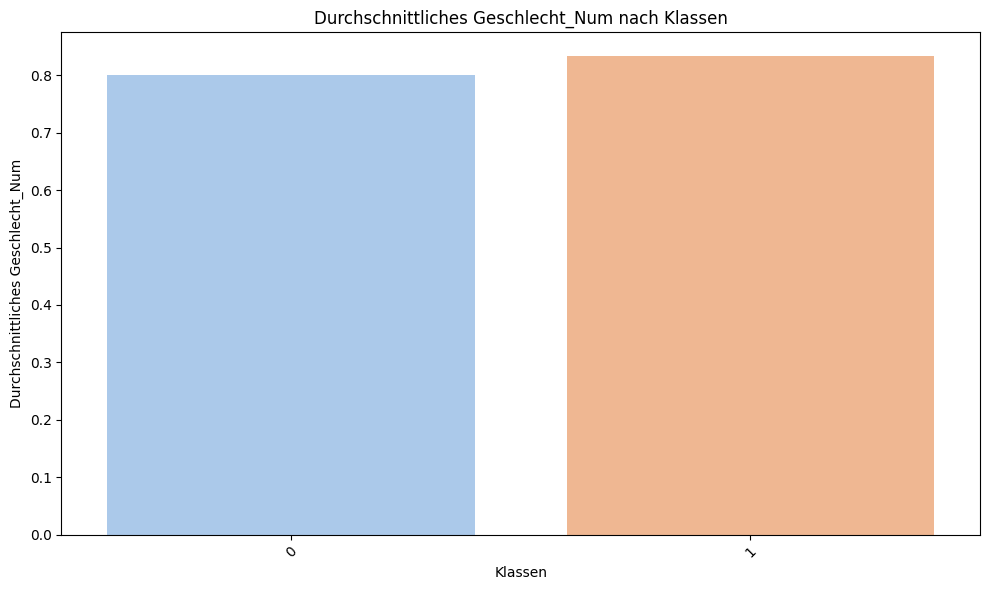

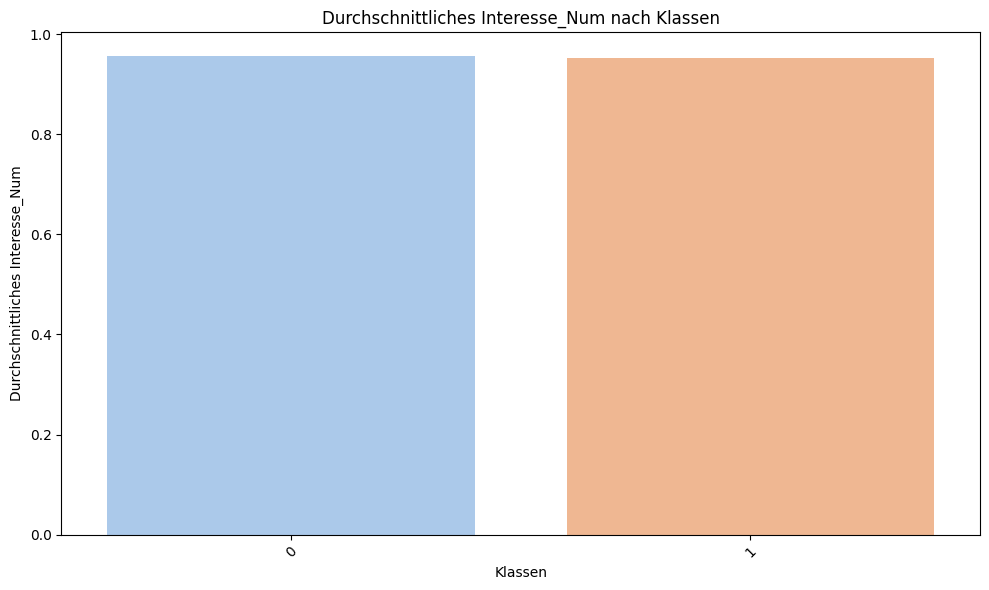

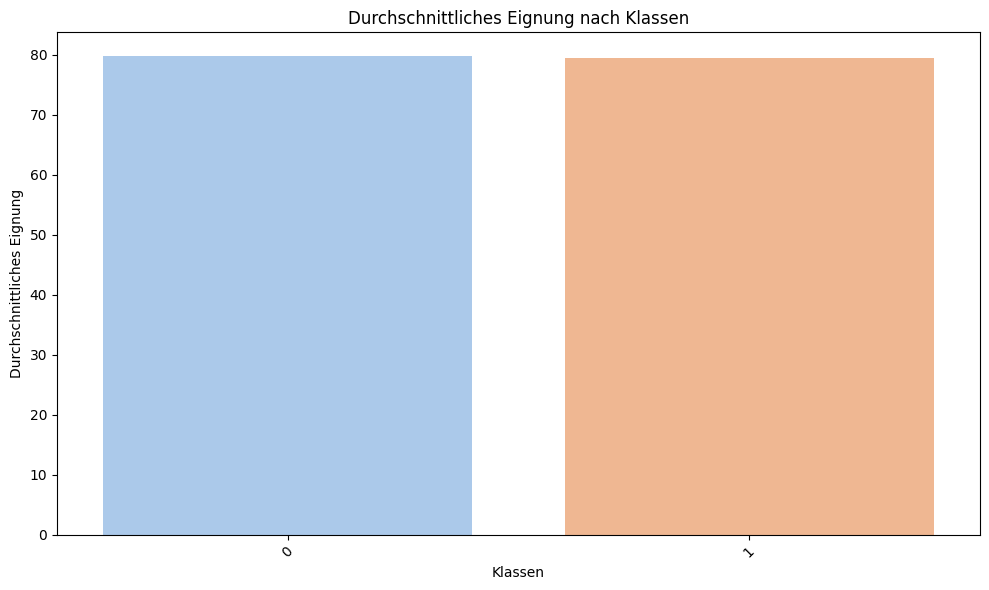

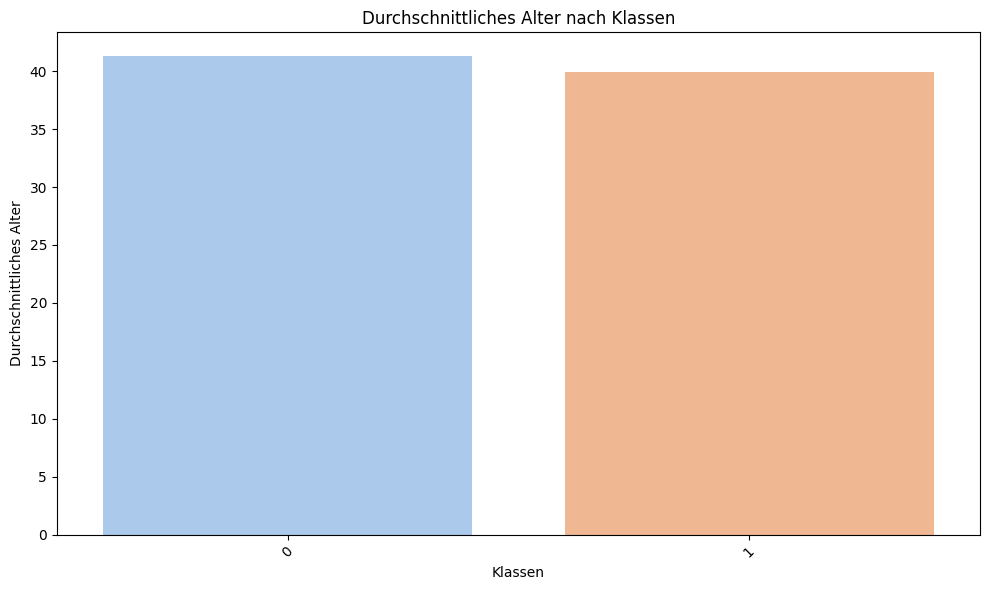

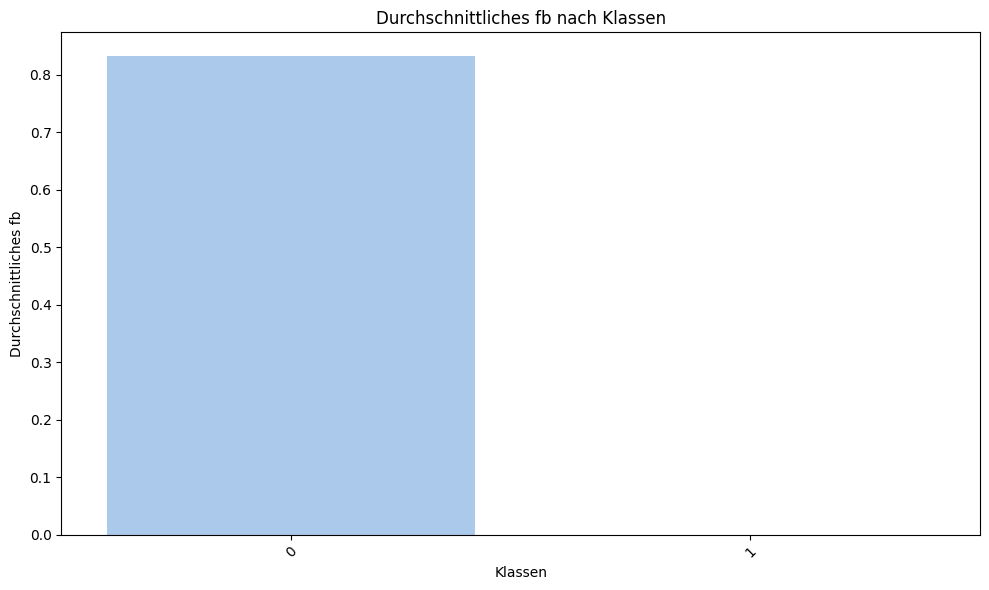

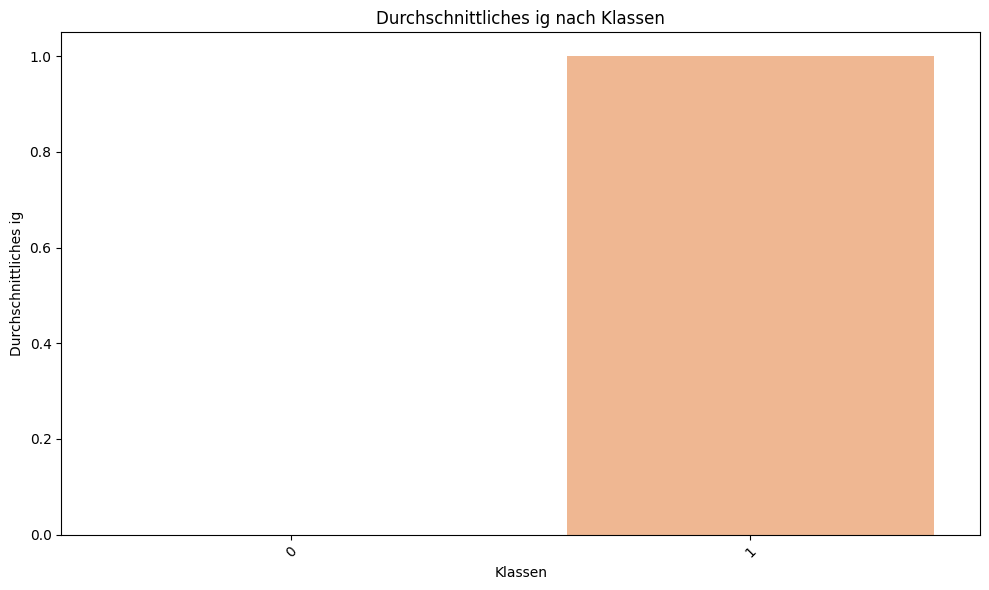

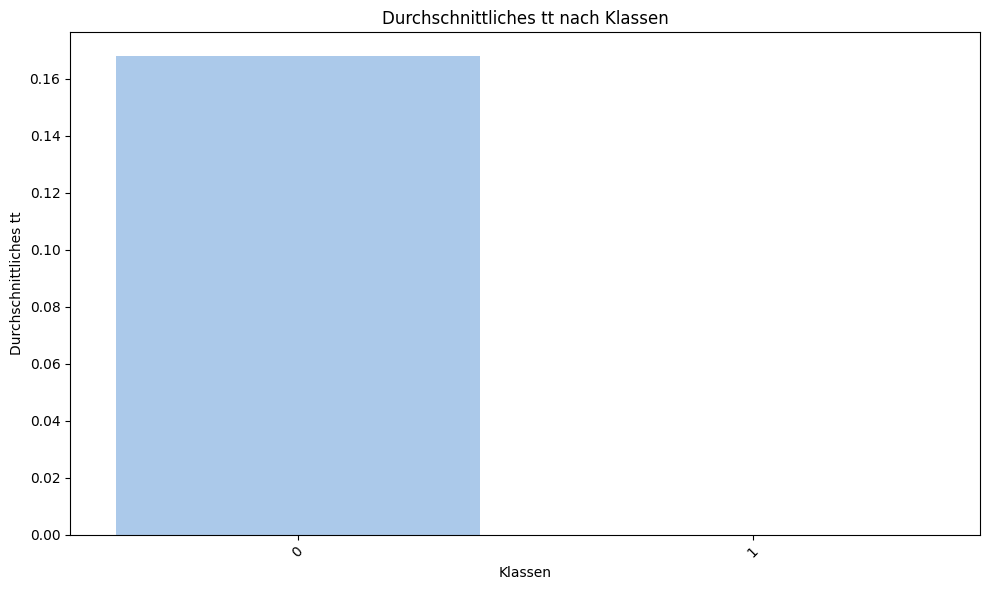

In [52]:
def plot_features_by_class(data):
    # Liste der ausgewählten Features (ohne 'klassen')
    features = ['Berufserfahrung_Num', 'Schulabschluss_Num', 'Ausbildung_Num', 'SQL', 'Geschlecht_Num','Interesse_Num','Eignung', 'Alter', 'fb', 'ig','tt']

    # Schleife durch die Features und erstelle Balkendiagramme
    for feature in features:
        # Berechnen des Durchschnittes für das aktuelle Feature pro Klasse
        average_feature_by_class = data.groupby('klassen')[feature].mean().reset_index()

        # Erstellen des Balkendiagramms
        plt.figure(figsize=(10, 6))
        sns.barplot(x='klassen', y=feature, data=average_feature_by_class, errorbar=None, palette='pastel')
        plt.xlabel('Klassen')
        plt.ylabel(f'Durchschnittliches {feature}')
        plt.title(f'Durchschnittliches {feature} nach Klassen')
        plt.xticks(rotation=45)
        plt.tight_layout()
        
        plt.show()

# Verwenden der Funktion, um Balkendiagramme für alle ausgewählten Features zu erstellen
plot_features_by_class(data)

##### eignung and interesse are dropped and I continue without those features, because there are no differences between the classes

Text(0.5, 0, 'Anzahl der Cluster')

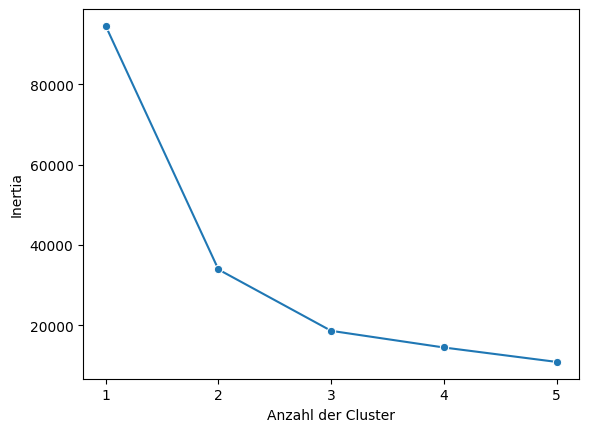

In [53]:
selected_features_reduced = ['Berufserfahrung_Num', 'Schulabschluss_Num', 'Ausbildung_Num','SQL', 'Geschlecht_Num', 'Alter', 'fb', 'ig','tt']  
X = data[selected_features_reduced] 

inertia = []

for i in range(1,6):
    km = sk_cluster.KMeans(n_clusters=i, n_init=10)
    km.fit(X=X)
    inertia.append(km.inertia_)

sns.lineplot(x=range(1,6), y=inertia, marker="o")
plt.xticks(range(1,6))
plt.ylabel("Inertia")
plt.xlabel("Anzahl der Cluster")

In [54]:
model_kmeans = sk_cluster.KMeans(n_clusters=2, n_init=10)
model_kmeans.fit(X)
data.loc[:, 'klassen'] = model_kmeans.predict(X)
data['klassen']

0       0
3       0
6       0
21      1
23      0
       ..
9564    0
9565    0
9573    0
9823    0
9963    1
Name: klassen, Length: 1058, dtype: int32

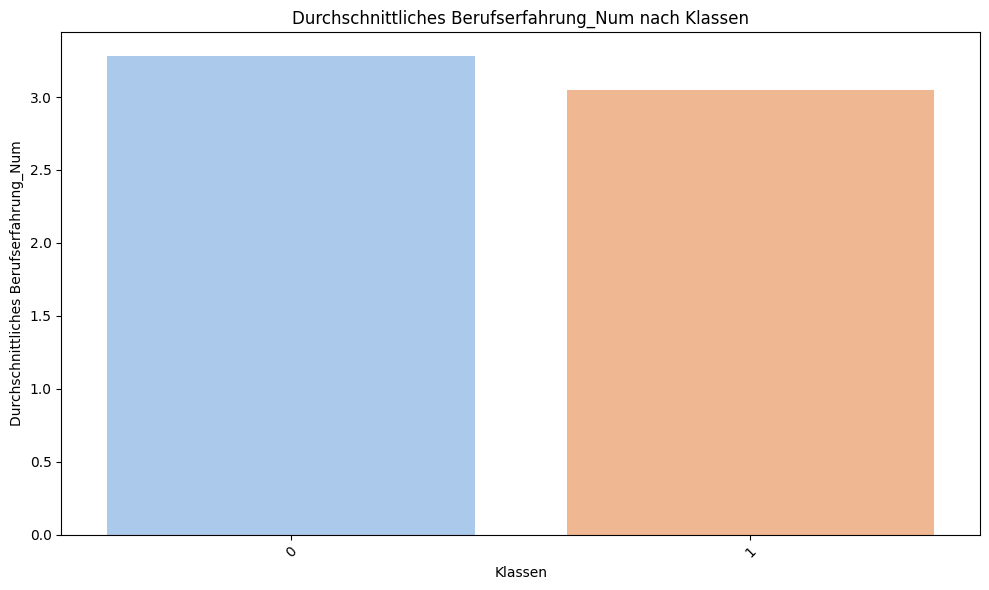

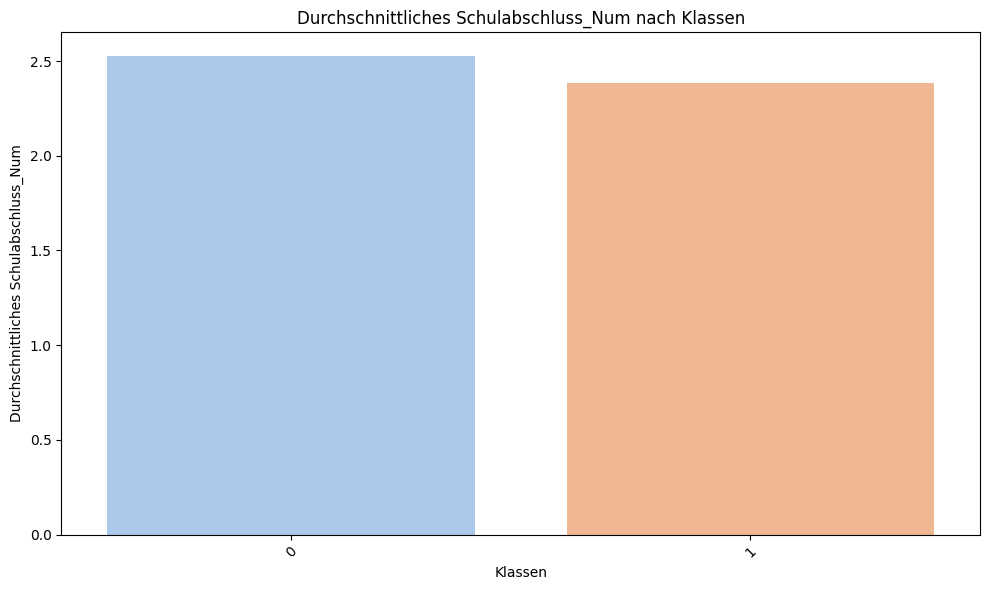

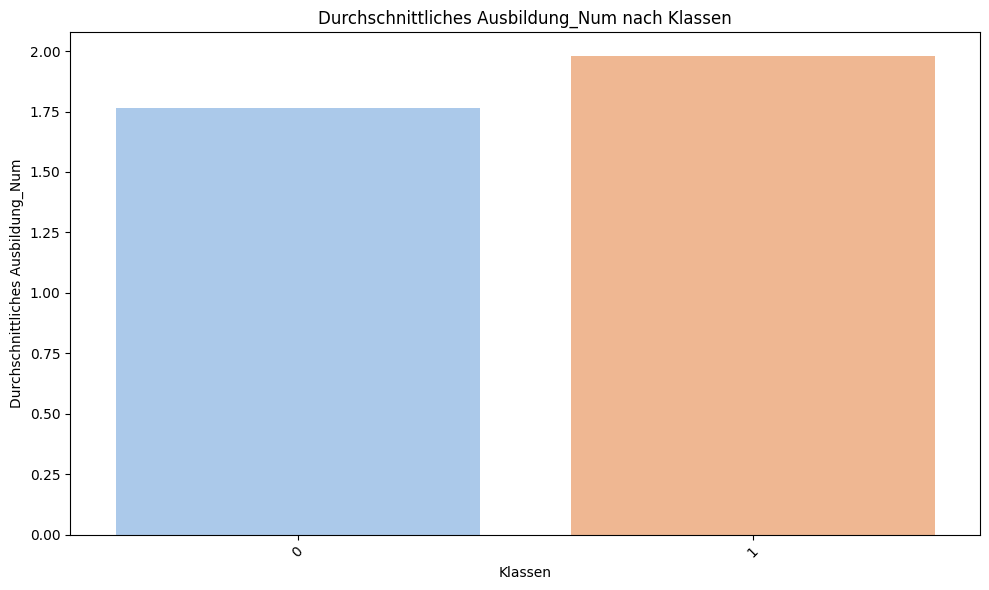

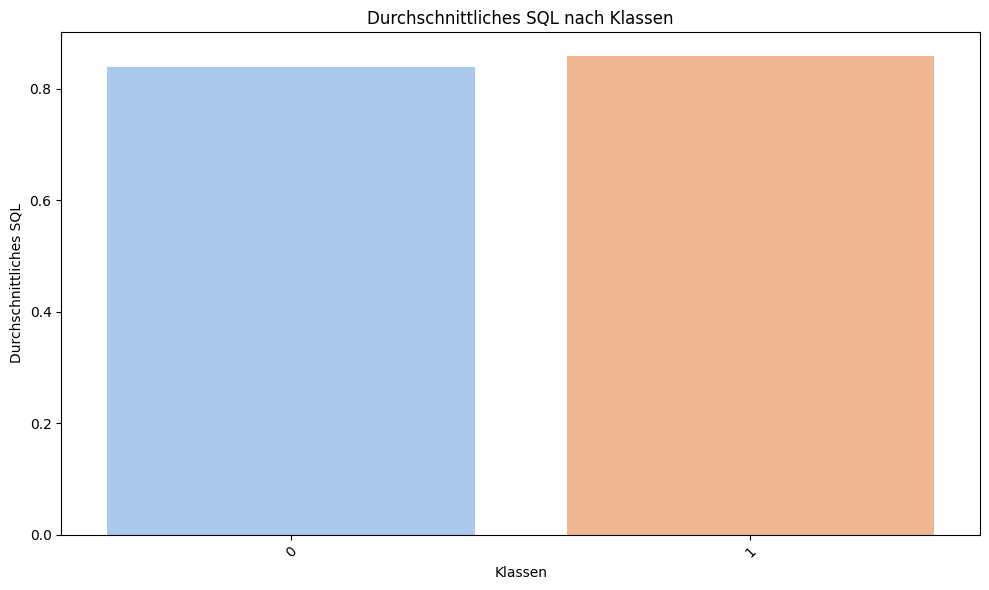

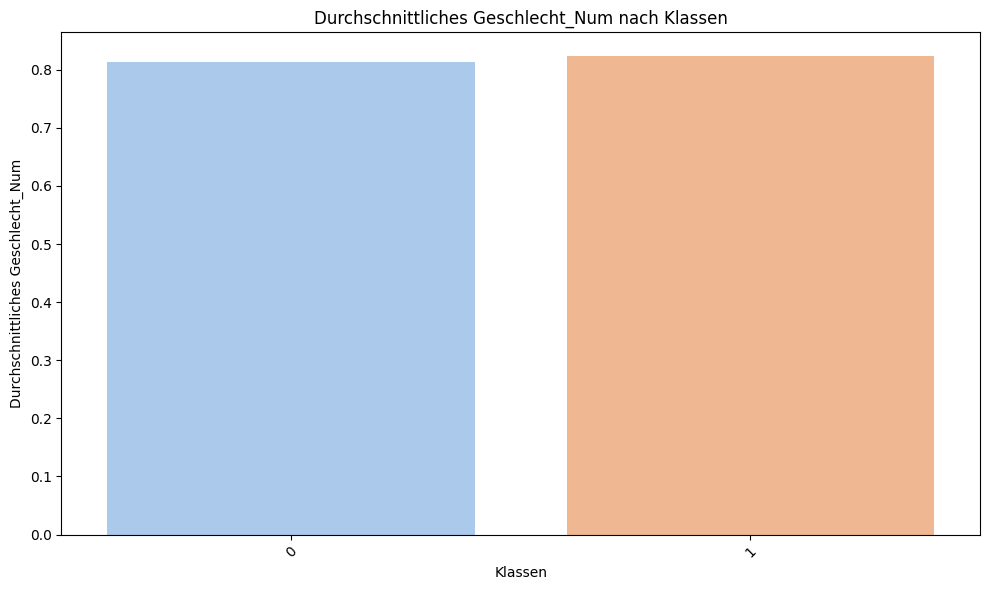

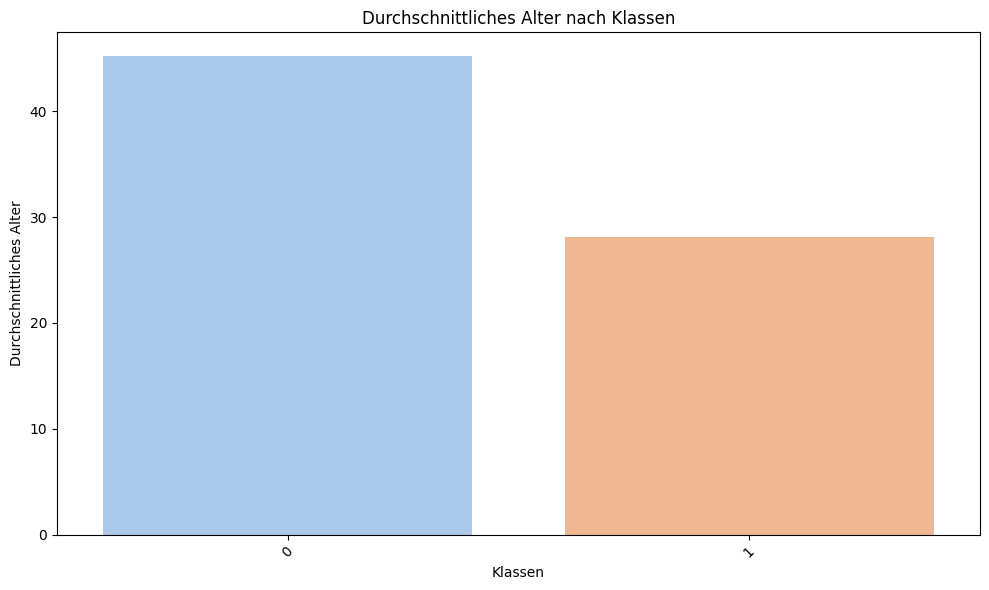

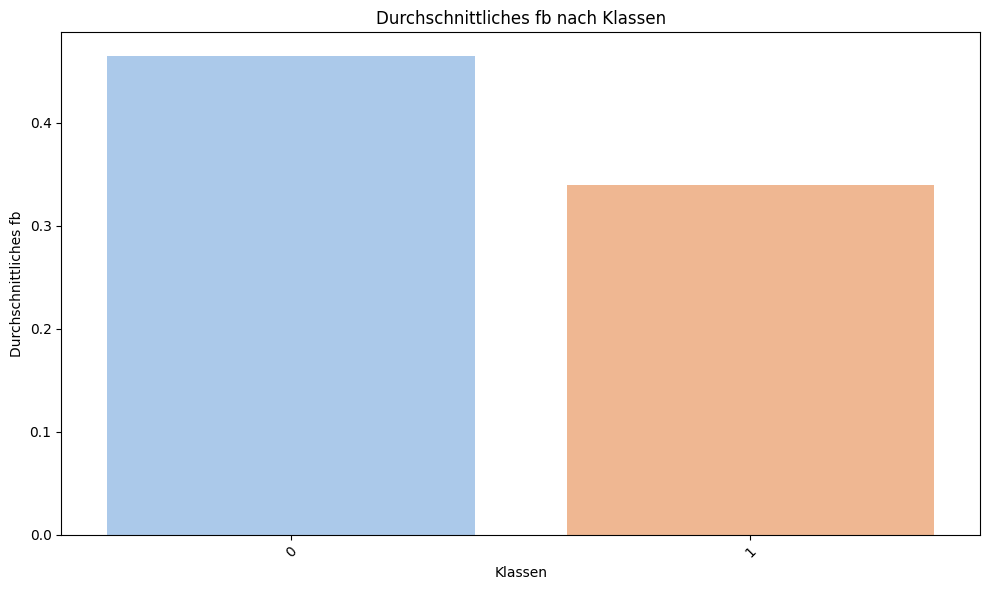

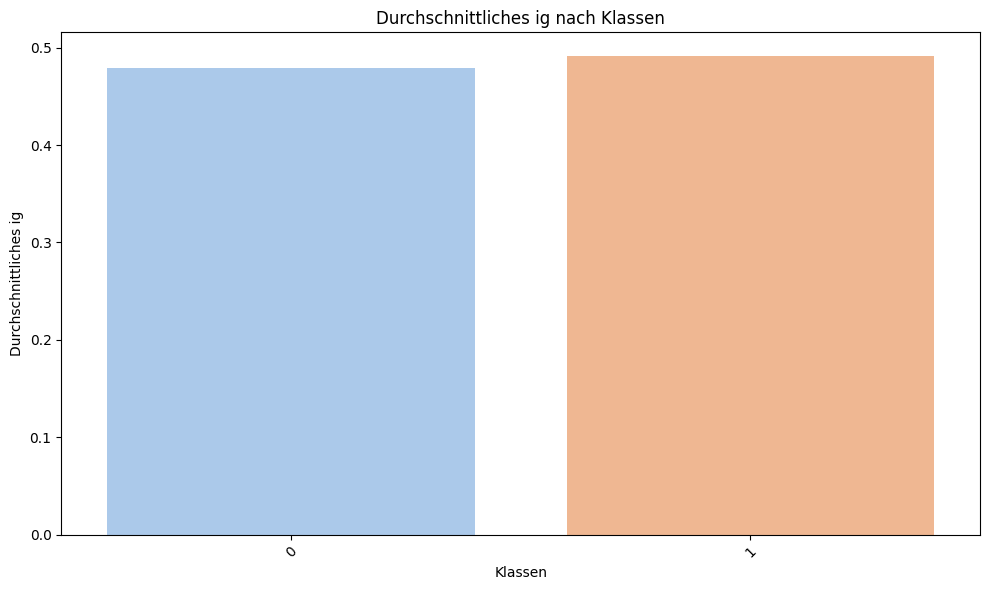

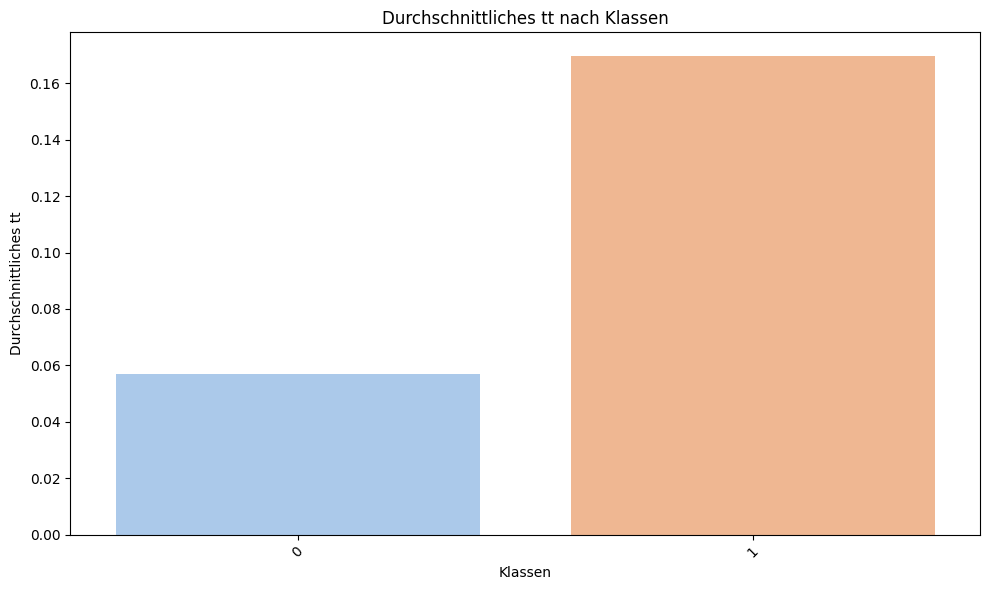

In [55]:
def plot_features_by_class(data):
    # Liste der ausgewählten Features (ohne 'klassen')
    features = ['Berufserfahrung_Num', 'Schulabschluss_Num', 'Ausbildung_Num','SQL', 'Geschlecht_Num', 'Alter', 'fb', 'ig','tt']

    # Schleife durch die Features und erstelle Balkendiagramme
    for feature in features:
        # Berechnen des Durchschnitts für das aktuelle Feature pro Klasse
        average_feature_by_class = data.groupby('klassen')[feature].mean().reset_index()

        # Erstellen des Balkendiagrammes
        plt.figure(figsize=(10, 6))
        sns.barplot(x='klassen', y=feature, data=average_feature_by_class, errorbar=None, palette='pastel')
        plt.xlabel('Klassen')
        plt.ylabel(f'Durchschnittliches {feature}')
        plt.title(f'Durchschnittliches {feature} nach Klassen')
        plt.xticks(rotation=45)
        plt.tight_layout()

        plt.show()

# Verwenden der Funktion, um Balkendiagramme für alle ausgewählten Features zu erstellen
plot_features_by_class(data)

##### dropping SQL and geschlecht since there are no differences between those classes

Text(0.5, 0, 'Anzahl der Cluster')

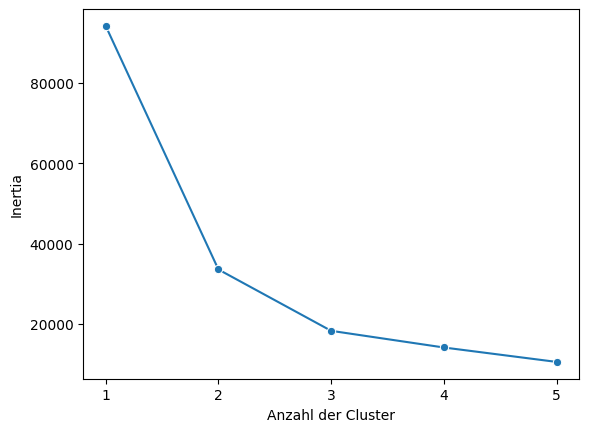

In [56]:
selected_features_further_reduced = ['Berufserfahrung_Num', 'Schulabschluss_Num', 'Ausbildung_Num', 'Alter', 'fb', 'ig','tt'] 
X = data[selected_features_further_reduced]

inertia = []

for i in range(1,6):
    km = sk_cluster.KMeans(n_clusters=i, n_init=10)
    km.fit(X=X)
    inertia.append(km.inertia_)

sns.lineplot(x=range(1,6), y=inertia, marker="o")
plt.xticks(range(1,6))
plt.ylabel("Inertia")
plt.xlabel("Anzahl der Cluster")

In [57]:
model_kmeans = sk_cluster.KMeans(n_clusters=2, n_init=10)
model_kmeans.fit(X)
data.loc[:, 'klassen'] = model_kmeans.predict(X)
data['klassen']

0       0
3       0
6       0
21      1
23      0
       ..
9564    0
9565    0
9573    0
9823    0
9963    1
Name: klassen, Length: 1058, dtype: int32

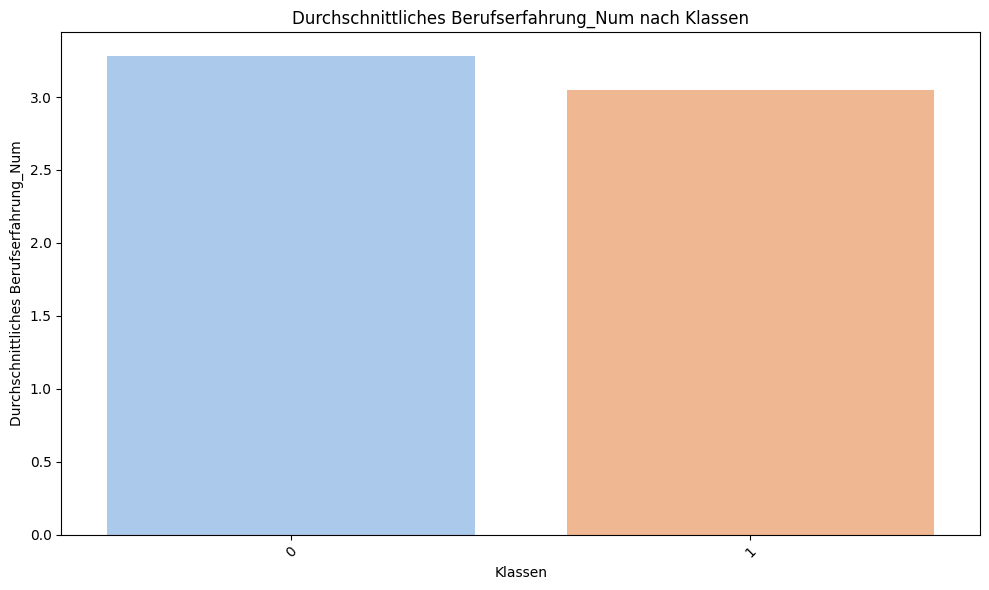

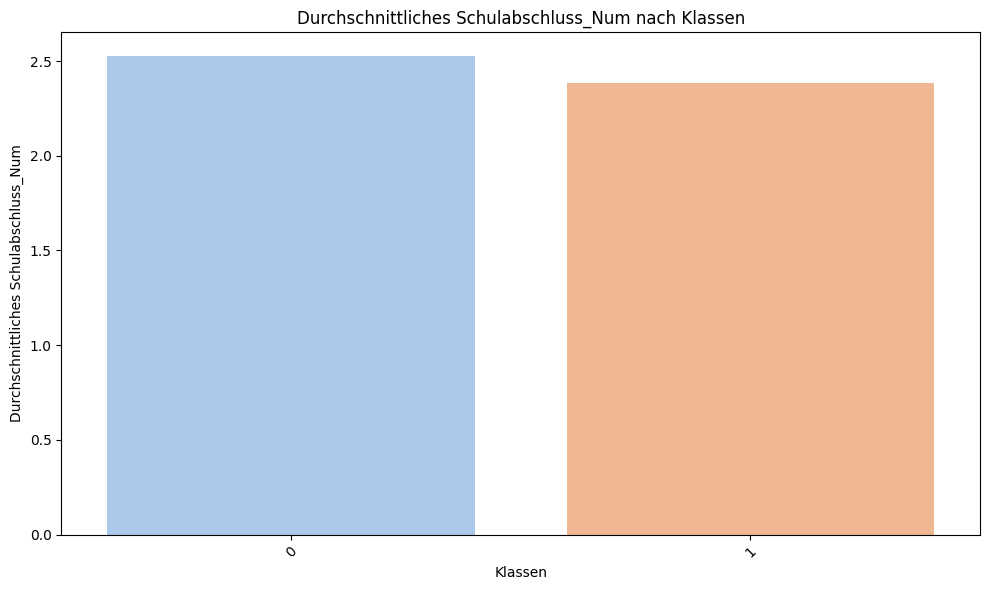

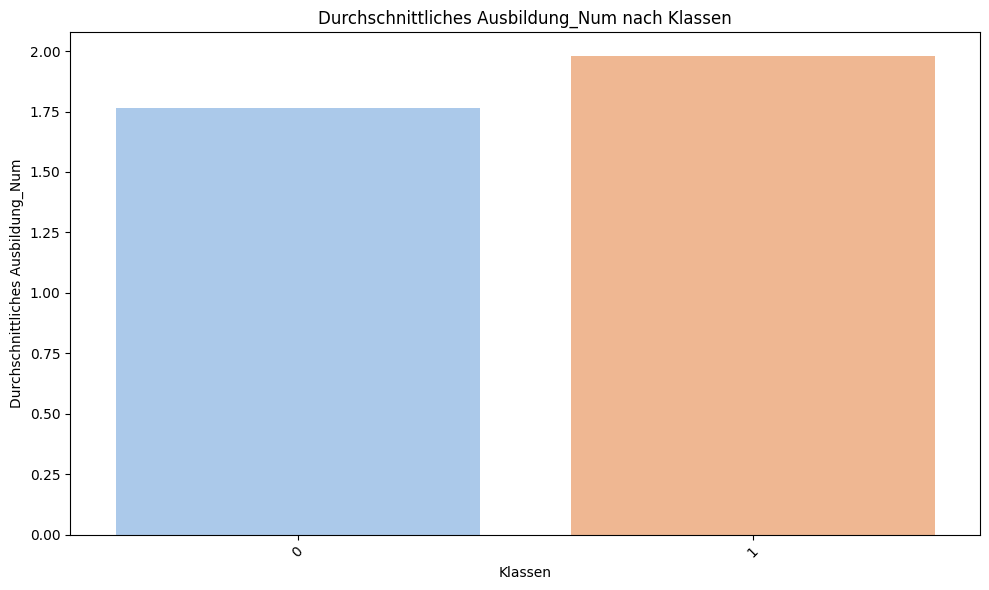

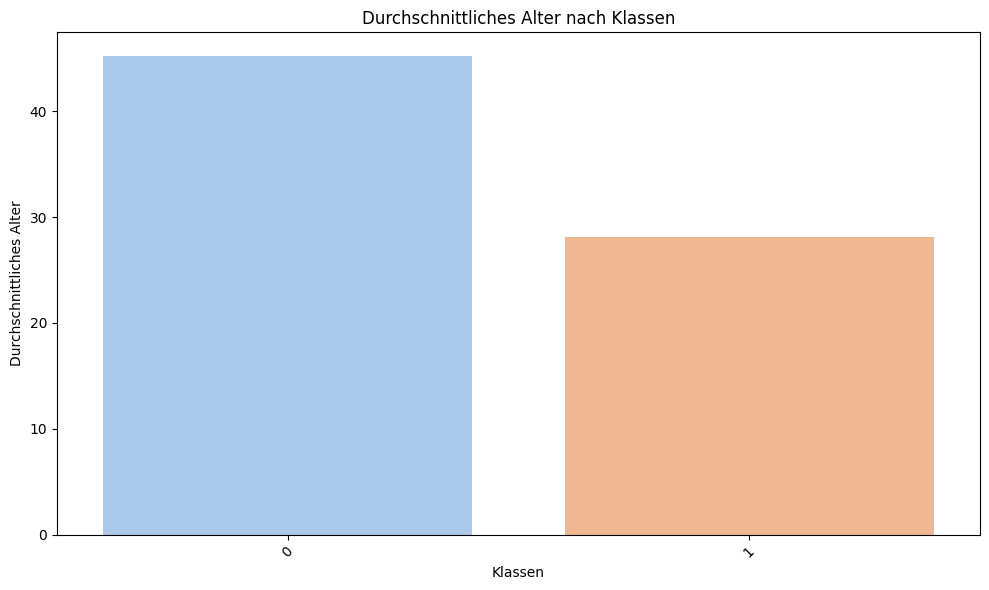

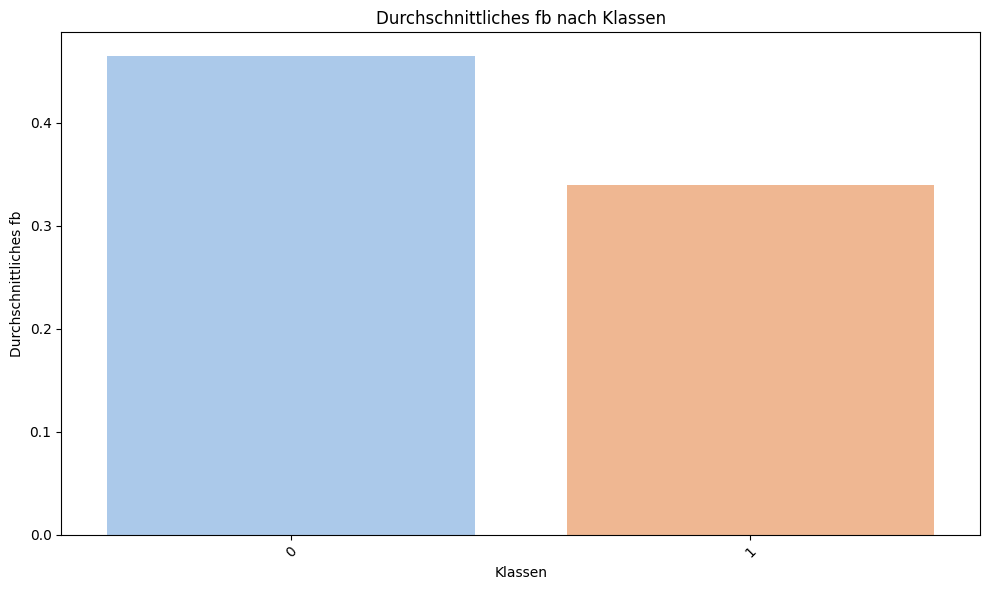

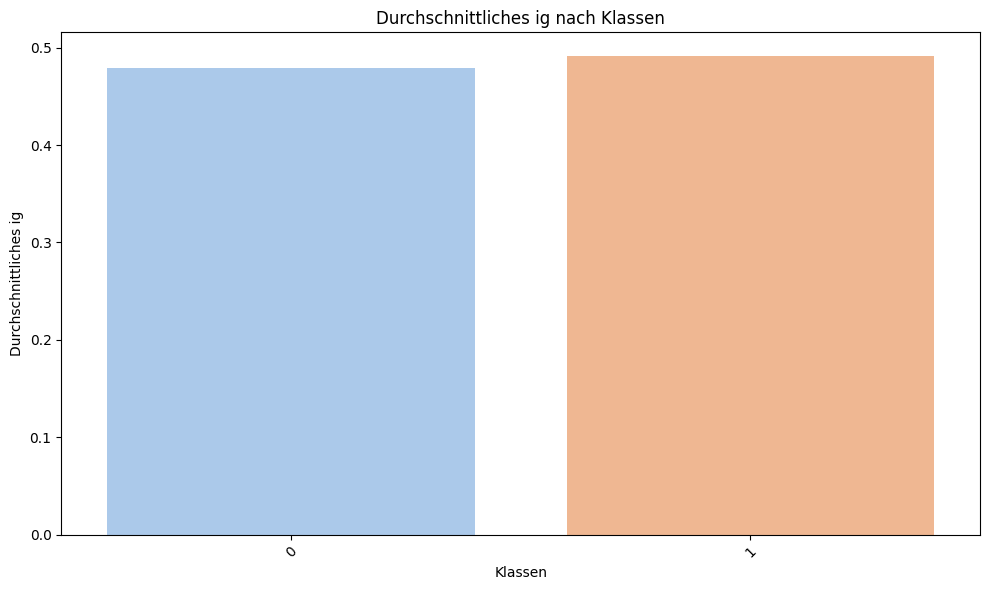

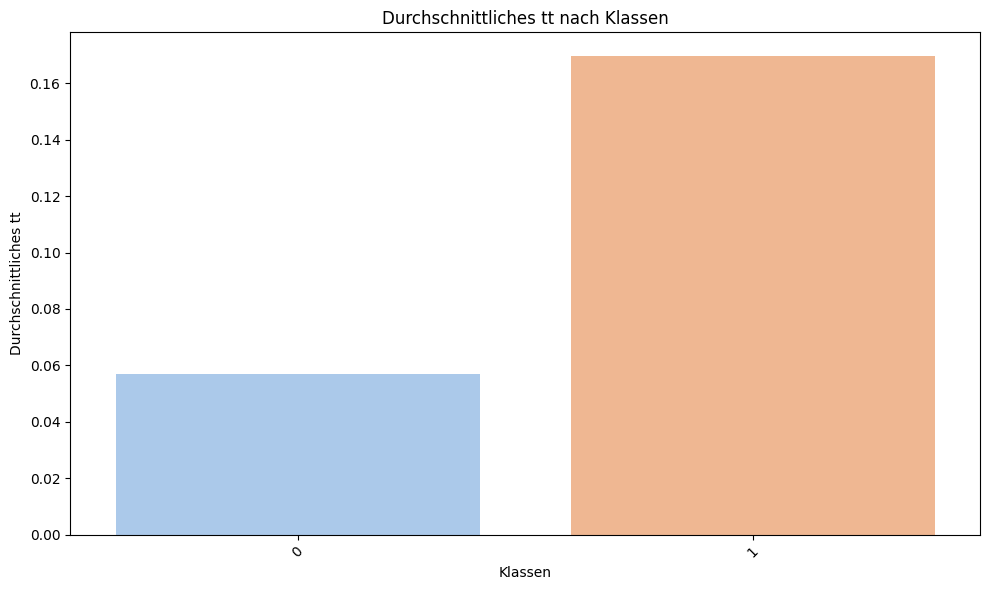

In [58]:
def plot_features_by_class(data):
    # Liste der ausgewählten Features (ohne 'klassen')
    features = ['Berufserfahrung_Num', 'Schulabschluss_Num', 'Ausbildung_Num', 'Alter', 'fb', 'ig','tt']

    # Schleife durch die Features und erstellen der Balkendiagramme
    for feature in features:
        # Berechnen des Durchschnittes für das aktuelle Feature pro Klasse
        average_feature_by_class = data.groupby('klassen')[feature].mean().reset_index()

        # Erstellen des Balkendiagramms
        plt.figure(figsize=(10, 6))
        sns.barplot(x='klassen', y=feature, data=average_feature_by_class, errorbar=None, palette='pastel')
        plt.xlabel('Klassen')
        plt.ylabel(f'Durchschnittliches {feature}')
        plt.title(f'Durchschnittliches {feature} nach Klassen')
        plt.xticks(rotation=45)
        plt.tight_layout()

        plt.show()

# Verwenden der Funktion, um Balkendiagramme für alle ausgewählten Features zu erstellen
plot_features_by_class(data)

#### dropping ig since there are no differences

Text(0.5, 0, 'Anzahl der Cluster')

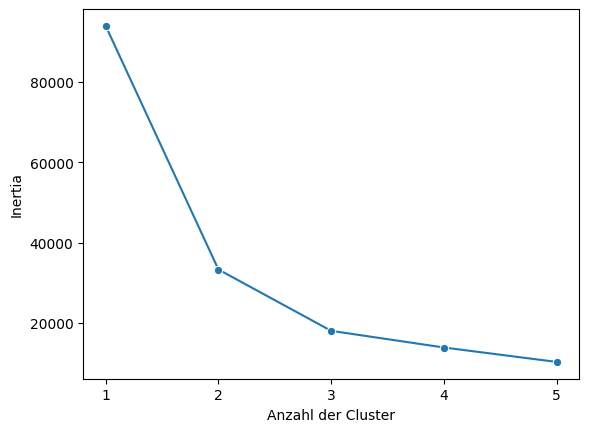

In [59]:
selected_features_further_reduced_last = ['Berufserfahrung_Num', 'Schulabschluss_Num', 'Ausbildung_Num', 'Alter', 'fb','tt'] 
X = data[selected_features_further_reduced_last]  

inertia = []

for i in range(1,6):
    km = sk_cluster.KMeans(n_clusters=i, n_init=10)
    km.fit(X=X)
    inertia.append(km.inertia_)

sns.lineplot(x=range(1,6), y=inertia, marker="o")
plt.xticks(range(1,6))
plt.ylabel("Inertia")
plt.xlabel("Anzahl der Cluster")

In [60]:
model_kmeans = sk_cluster.KMeans(n_clusters=2, n_init=10)
model_kmeans.fit(X)
data.loc[:, 'klassen'] = model_kmeans.predict(X)
data['klassen']

0       0
3       0
6       0
21      1
23      0
       ..
9564    0
9565    0
9573    0
9823    0
9963    1
Name: klassen, Length: 1058, dtype: int32

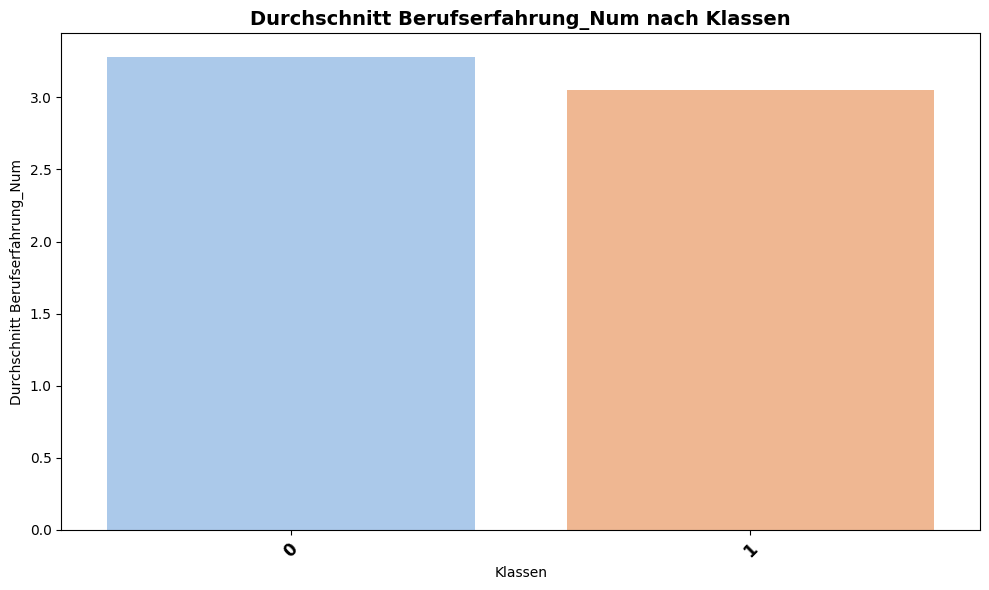

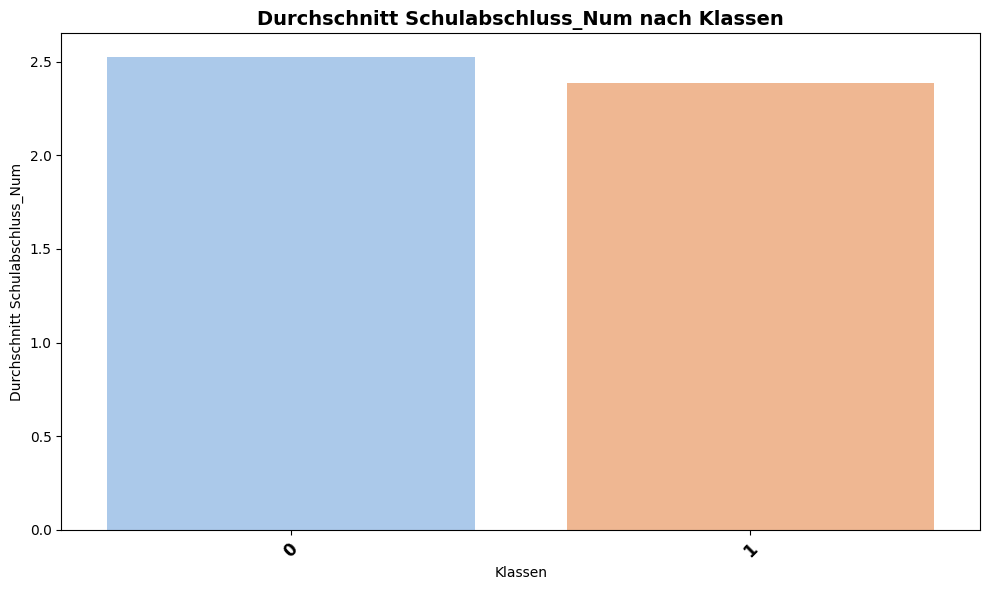

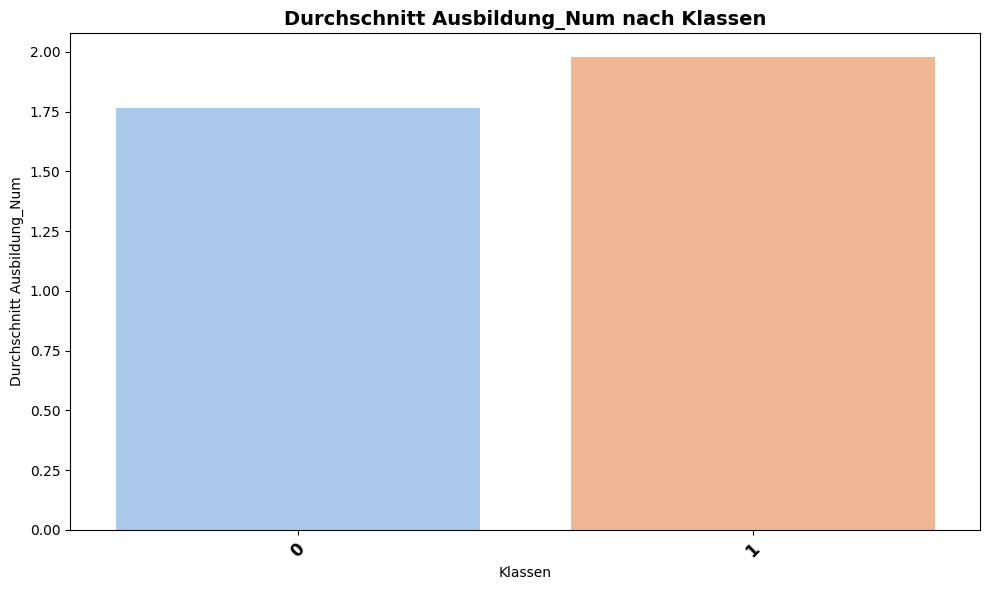

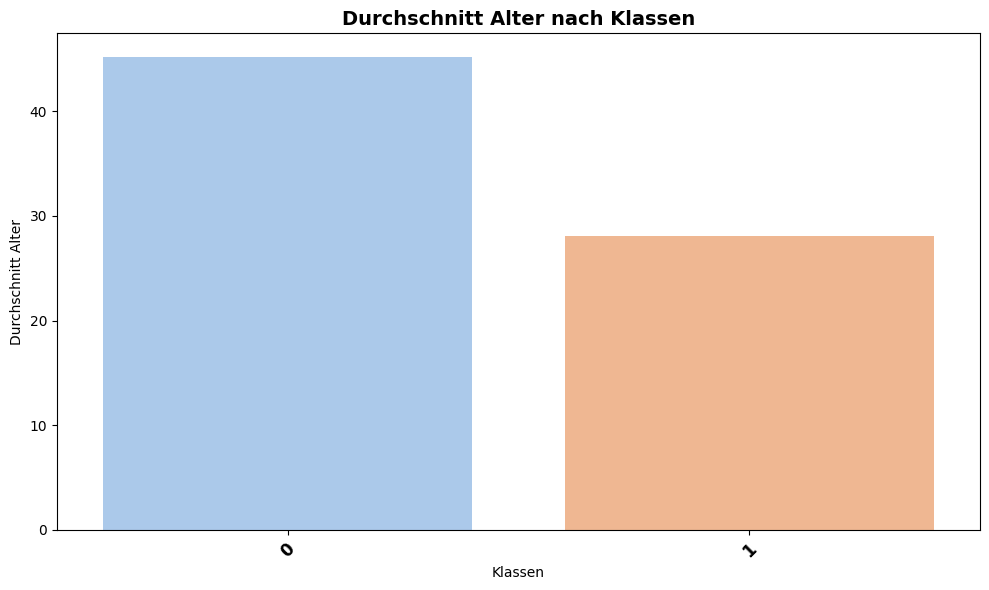

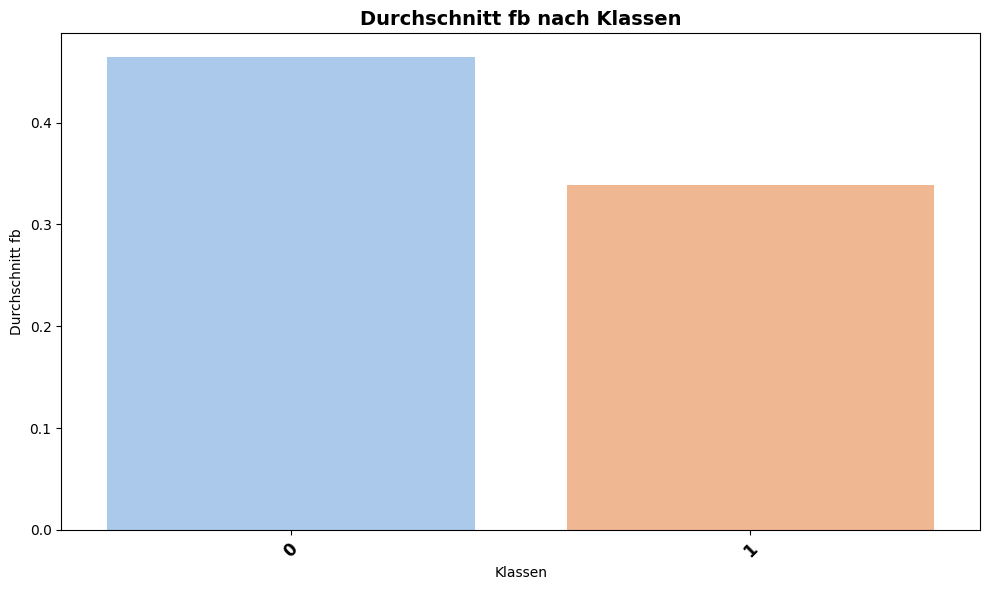

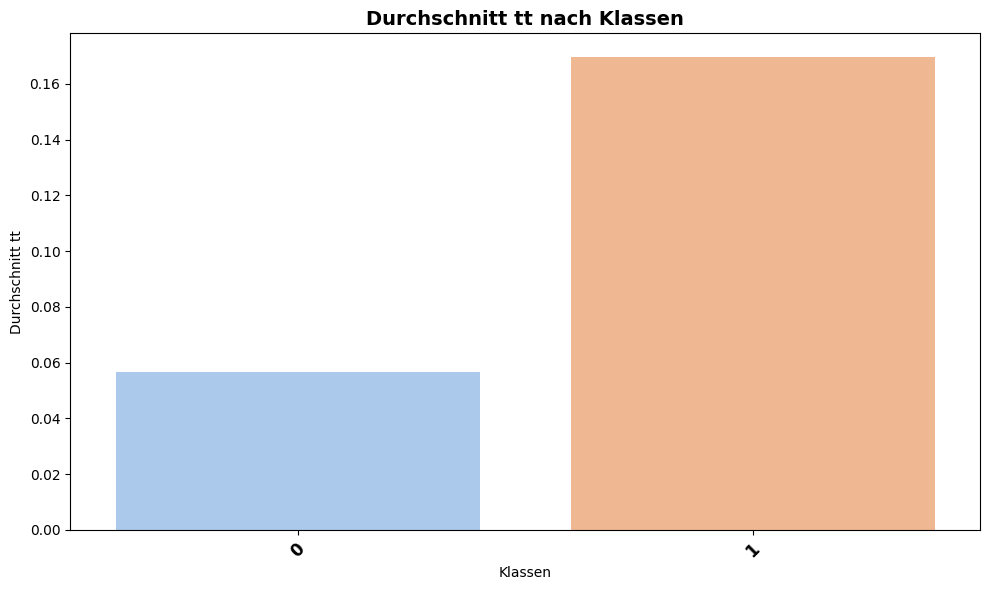

In [113]:
def plot_features_by_class(data):
    # Liste der ausgewählten Features (ohne 'klassen')
    features = ['Berufserfahrung_Num', 'Schulabschluss_Num', 'Ausbildung_Num', 'Alter', 'fb', 'tt']

    # Schleife durch die Features und erstellen der Balkendiagramme
    for feature in features:
        # Berechnen des Durchschnittes für das aktuelle Feature pro Klasse
        average_feature_by_class = data.groupby('klassen')[feature].mean().reset_index()

        # Erstellen des Balkendiagrammes
        plt.figure(figsize=(10, 6))
        sns.barplot(x='klassen', y=feature, data=average_feature_by_class, errorbar=None, palette='pastel')
        plt.xlabel('Klassen')
        plt.ylabel(f'Durchschnitt {feature}')
        plt.title(f'Durchschnitt {feature} nach Klassen', fontweight='bold', fontsize=14)  # Fett und Größe ändern
        plt.xticks(rotation=45, fontweight='bold', fontsize=12)  # Fett und Größe ändern
        plt.tight_layout()

        plt.show()

# Verwenden der Funktion, um Balkendiagramme für alle ausgewählten Features zu erstellen
plot_features_by_class(data)


#### result clustering

Das Clustering läßt mich zu folgendem Ergebnis kommen:
-2 Gruppen
-5 Merkmale: Berufserfahrung, Schulabschluß, Ausbildung, Alter und Source. 
Bei der Reduzierung der Merkmale habe ich die rausgenommen, wo es keine Unterschiede zwischen den Gruppen gab. 
Instagramm wird in beiden Gruppen z.b. gleich benutzt. 

Alter: Klare Unterschiede sieht man beim Alter. Die erste Gruppe ist im Schnitt 45 und die zweite Gruppe 28. 
Source: Auch sieht man klare Unterschiede in der Nutzung von Social media. Die erste Gruppe nutzt mehr facebook und viel weniger tiktok, während die zweite "jüngere" Gruppe definitiv tiktok user ist. 

Bei der Deutung der Ergebnisse für Berufserfahrung, Schulabschluß und Ausbildung sieht man auf den ersten Blick keine klaren Unterschiede, weil Durchschnittswerte von 1 bis 6 gebildet werden. Daher schlüssele ich diese Merkmale mit ihren 6 Eigenschaften für jede Klasse erneut auf. Diese Grafiken zeige ich hier auch im Folgenden.
Man kann gut erkennen, dass die Verteilung anders ist zwischen den Klassen auch wenn der erste Platz bei Ausbildung und Schulabschluß identisch ist. 

Berufserfahrung: 10 bis 15 Jahre (Klasse 1), 0 bis 5 Jahre (Klasse 2)
Schulabschluß: Hauptschule (Klasse 1), Hauptschule (Klasse 2)
Ausbildung: keine abgeschlossene Berufsausbildung (Klasse 1), keine abgeschlossene Berufsausbildung (Klasse 2)


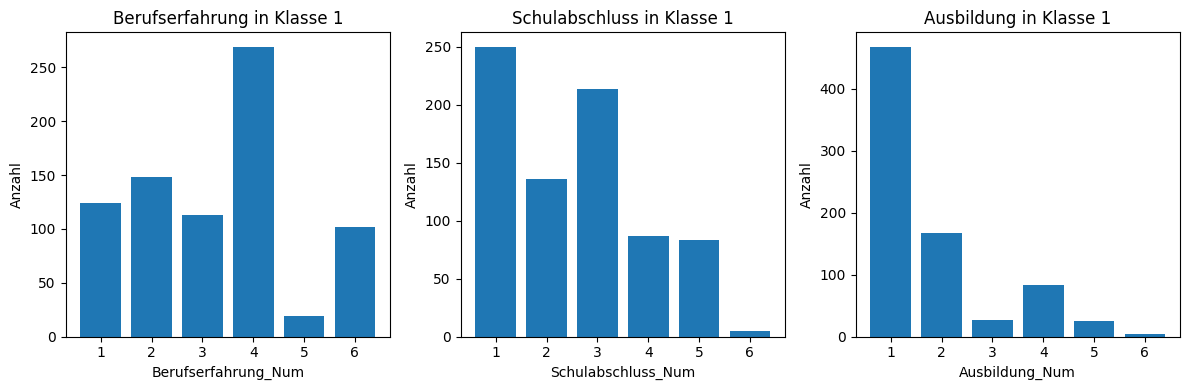

In [92]:
#Klasse 1
data_c1 = data[data['klassen']== 0]

# Sortieren Sie die Daten nach den Kategorien
berufserfahrung_counts = data_c1['Berufserfahrung_Num'].value_counts().sort_index()
schulabschluss_counts = data_c1['Schulabschluss_Num'].value_counts().sort_index()
ausbildung_counts = data_c1['Ausbildung_Num'].value_counts().sort_index()

# Erstellen Sie Histogramme für jede Variable
plt.figure(figsize=(12, 4))

# Histogramm für Berufserfahrung_Num
plt.subplot(131)
plt.bar(berufserfahrung_counts.index, berufserfahrung_counts.values)
plt.xlabel('Berufserfahrung_Num')
plt.ylabel('Anzahl')
plt.title('Berufserfahrung in Klasse 1')

# Histogramm für Schulabschluss_Num
plt.subplot(132)
plt.bar(schulabschluss_counts.index, schulabschluss_counts.values)
plt.xlabel('Schulabschluss_Num')
plt.ylabel('Anzahl')
plt.title('Schulabschluss in Klasse 1')

# Histogramm für Ausbildung_Num
plt.subplot(133)
plt.bar(ausbildung_counts.index, ausbildung_counts.values)
plt.xlabel('Ausbildung_Num')
plt.ylabel('Anzahl')
plt.title('Ausbildung in Klasse 1')

plt.tight_layout()
plt.show()


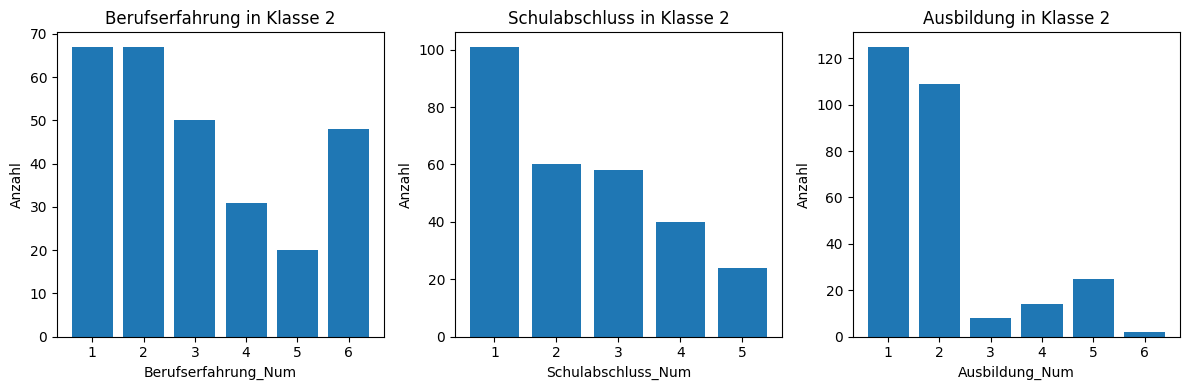

In [93]:
#Klasse 2
data_c2 = data[data['klassen']== 1]

# Sortieren Sie die Daten nach den Kategorien
berufserfahrung_counts = data_c2['Berufserfahrung_Num'].value_counts().sort_index()
schulabschluss_counts = data_c2['Schulabschluss_Num'].value_counts().sort_index()
ausbildung_counts = data_c2['Ausbildung_Num'].value_counts().sort_index()

# Erstellen Sie Histogramme für jede Variable
plt.figure(figsize=(12, 4))

# Histogramm für Berufserfahrung_Num
plt.subplot(131)
plt.bar(berufserfahrung_counts.index, berufserfahrung_counts.values)
plt.xlabel('Berufserfahrung_Num')
plt.ylabel('Anzahl')
plt.title('Berufserfahrung in Klasse 2')

# Histogramm für Schulabschluss_Num
plt.subplot(132)
plt.bar(schulabschluss_counts.index, schulabschluss_counts.values)
plt.xlabel('Schulabschluss_Num')
plt.ylabel('Anzahl')
plt.title('Schulabschluss in Klasse 2')

# Histogramm für Ausbildung_Num
plt.subplot(133)
plt.bar(ausbildung_counts.index, ausbildung_counts.values)
plt.xlabel('Ausbildung_Num')
plt.ylabel('Anzahl')
plt.title('Ausbildung in Klasse 2')

plt.tight_layout()
plt.show()


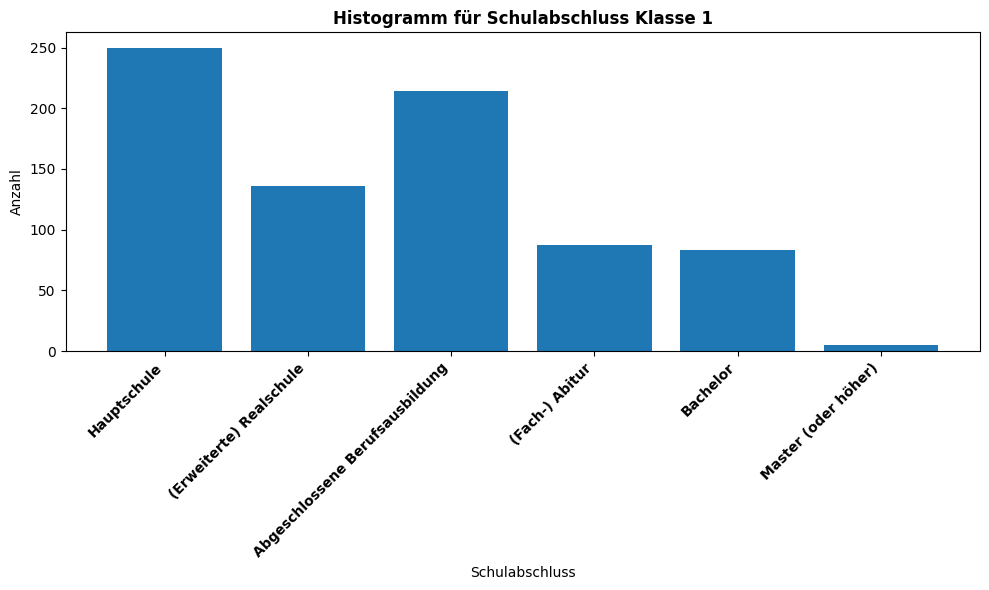

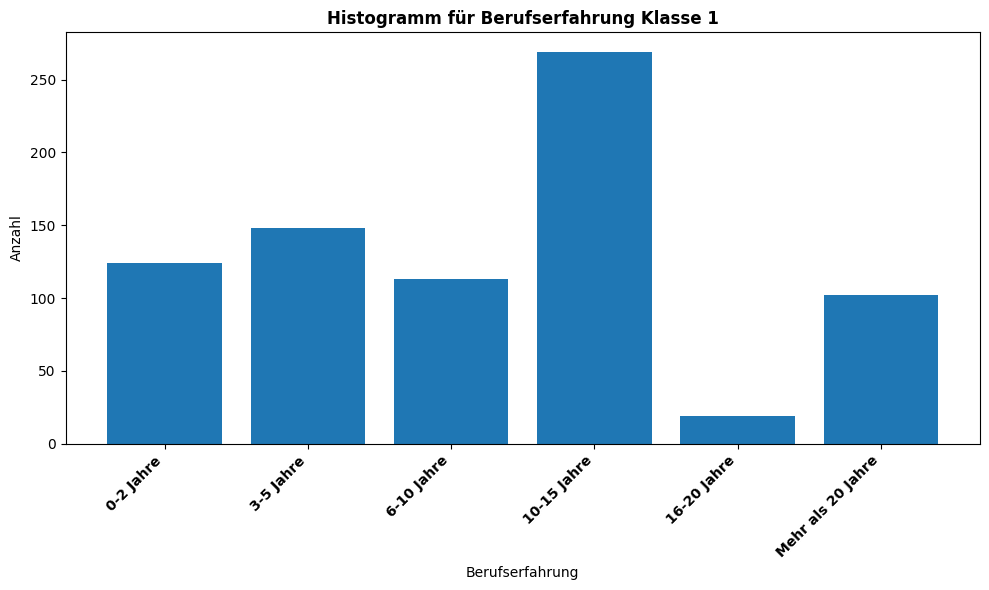

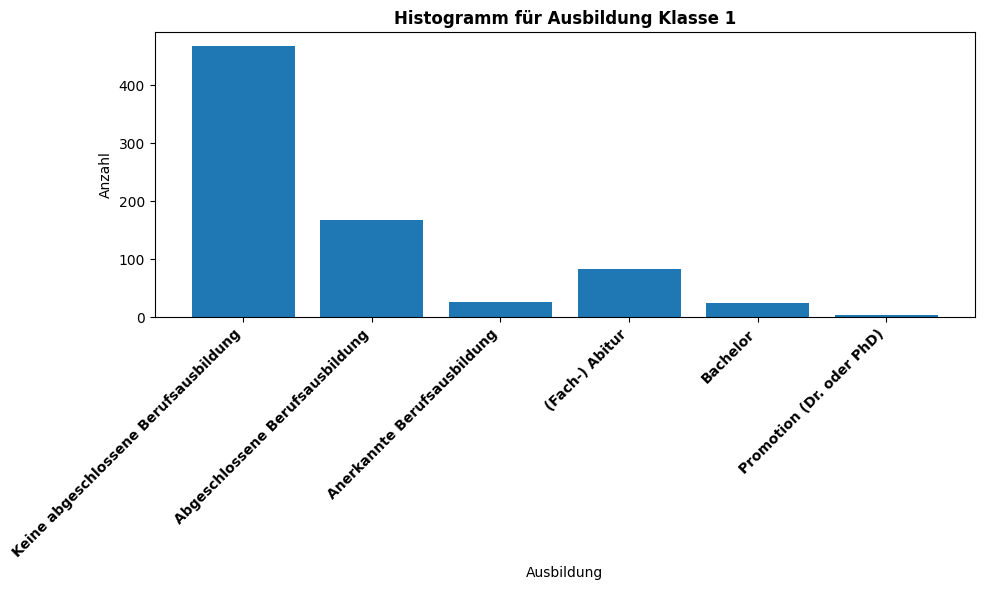

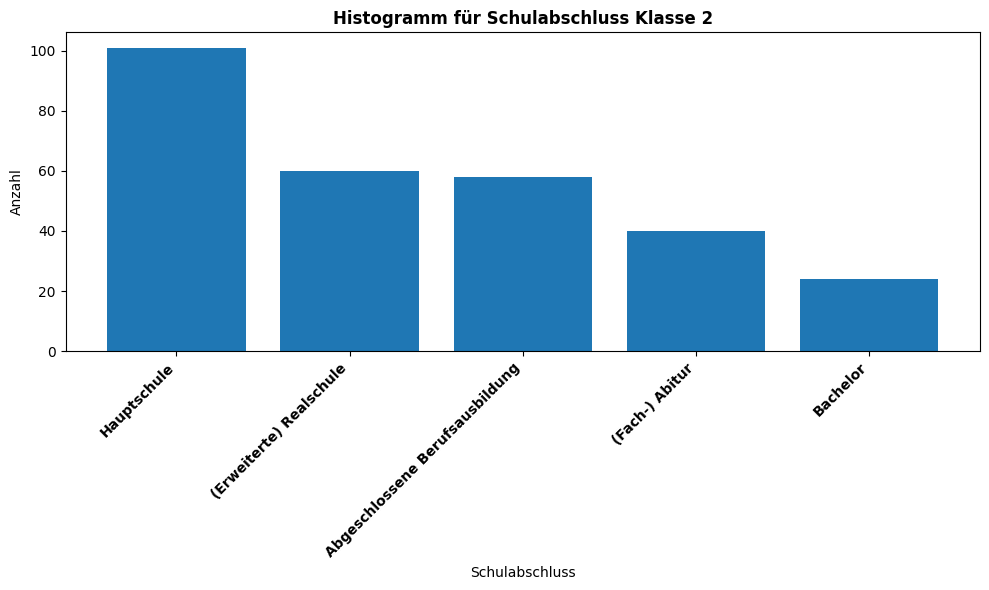

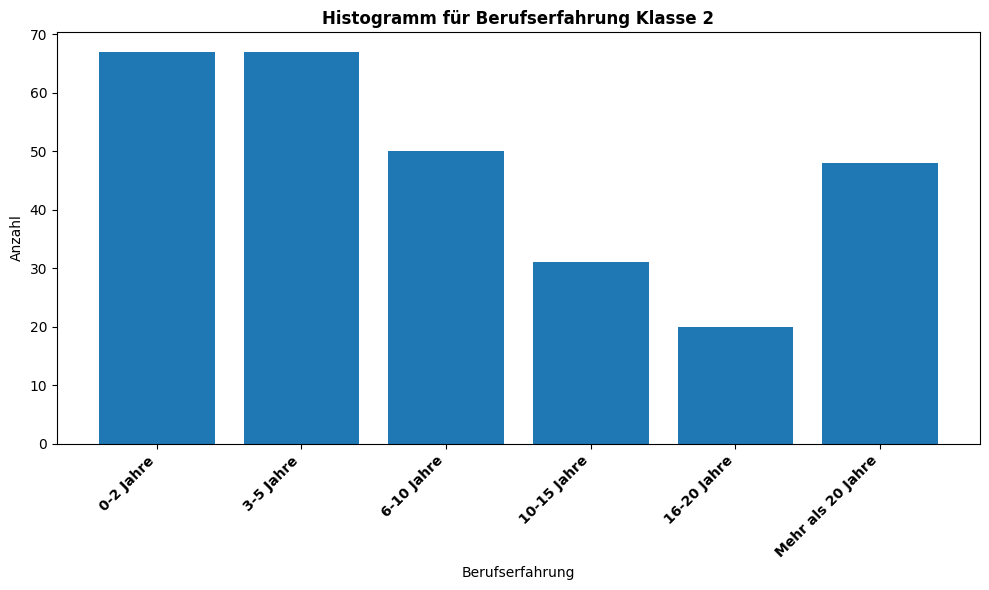

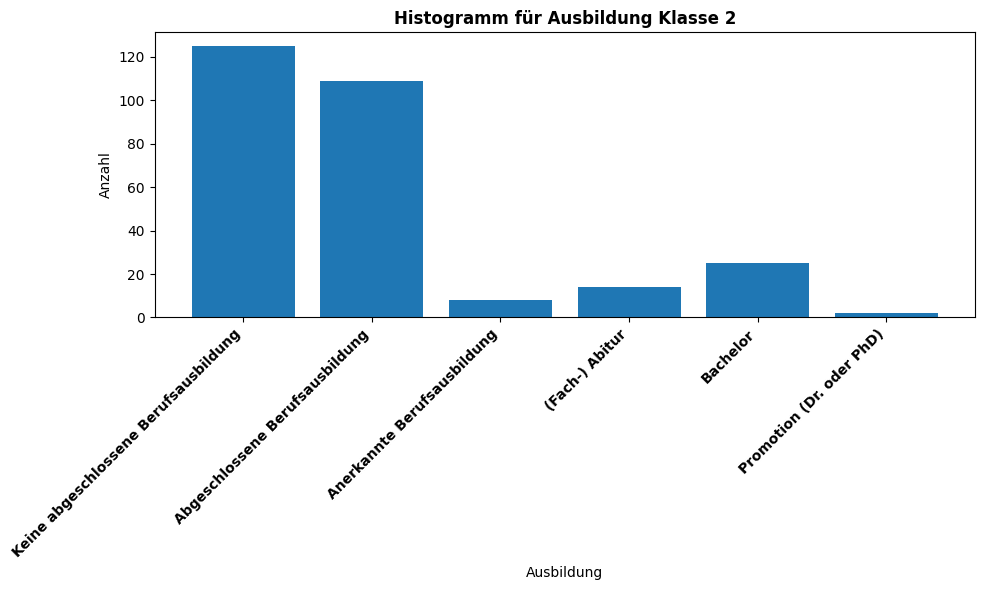

In [110]:
# Eindeutige Kategorien für den Schulabschluss
unique_schulabschluss = {
    1: 'Hauptschule',
    2: '(Erweiterte) Realschule',
    3: 'Abgeschlossene Berufsausbildung',
    4: '(Fach-) Abitur',
    5: 'Bachelor',
    6: 'Master (oder höher)'
}

# Eindeutige Kategorien für die Berufserfahrung
erfahrungs_mapping = {
    1: '0-2 Jahre',
    2: '3-5 Jahre',
    3: '6-10 Jahre',
    4: '10-15 Jahre',
    5: '16-20 Jahre',
    6: 'Mehr als 20 Jahre'
}

# Eindeutige Kategorien für die Ausbildung
ausbildung_mapping = {
    1: 'Keine abgeschlossene Berufsausbildung',
    2: 'Abgeschlossene Berufsausbildung',
    3: 'Anerkannte Berufsausbildung',
    4: '(Fach-) Abitur',
    5: 'Bachelor',
    6: 'Promotion (Dr. oder PhD)'
}

# Bereinigen Sie die Daten für Schulabschluss und Berufserfahrung
data['Schulabschluss_Num'] = data['Schulabschluss_Num'].replace({
    'abgeschlossene berufsausbildung': 'Abgeschlossene Berufsausbildung',
    'abgeschlossene_berufsausbildung': 'Abgeschlossene Berufsausbildung',
    '(erweitert) realschule': '(Erweiterte) Realschule',
    '(erweitert)_realschule': '(Erweiterte) Realschule',
    '(fach-) abitur': '(Fach-) Abitur',
    '(fach-)_abitur': '(Fach-) Abitur',
    'bachelor': 'Bachelor'
})

#Klasse 1
data_c1 = data[data['klassen']== 0]

# Sortieren Sie die Daten nach den Kategorien
schulabschluss_counts = data_c1['Schulabschluss_Num'].value_counts().sort_index()
berufserfahrung_counts = data_c1['Berufserfahrung_Num'].value_counts().sort_index()
ausbildung_counts = data_c1['Ausbildung_Num'].value_counts().sort_index()

# Diagramm für Schulabschluss_Num
plt.figure(figsize=(10, 6))
plt.bar([unique_schulabschluss[k] for k in schulabschluss_counts.index], schulabschluss_counts.values)
plt.xticks(rotation=45, ha="right", fontweight='bold')
plt.xlabel('Schulabschluss')
plt.ylabel('Anzahl')
plt.title('Histogramm für Schulabschluss Klasse 1', fontweight='bold')
plt.tight_layout()
plt.show()

# Diagramm für Berufserfahrung_Num
plt.figure(figsize=(10, 6))
plt.bar([erfahrungs_mapping[k] for k in berufserfahrung_counts.index], berufserfahrung_counts.values)
plt.xticks(rotation=45, ha="right", fontweight='bold')
plt.xlabel('Berufserfahrung')
plt.ylabel('Anzahl')
plt.title('Histogramm für Berufserfahrung Klasse 1', fontweight='bold')
plt.tight_layout()
plt.show()

# Diagramm für Ausbildung_Num
plt.figure(figsize=(10, 6))
plt.bar([ausbildung_mapping[k] for k in ausbildung_counts.index], ausbildung_counts.values)
plt.xticks(rotation=45, ha="right", fontweight='bold')
plt.xlabel('Ausbildung')
plt.ylabel('Anzahl')
plt.title('Histogramm für Ausbildung Klasse 1', fontweight='bold')
plt.tight_layout()
plt.show()


#Klasse 2
data_c2 = data[data['klassen']== 1]

# Sortieren Sie die Daten nach den Kategorien
schulabschluss_counts = data_c2['Schulabschluss_Num'].value_counts().sort_index()
berufserfahrung_counts = data_c2['Berufserfahrung_Num'].value_counts().sort_index()
ausbildung_counts = data_c2['Ausbildung_Num'].value_counts().sort_index()

# Diagramm für Schulabschluss_Num
plt.figure(figsize=(10, 6))
plt.bar([unique_schulabschluss[k] for k in schulabschluss_counts.index], schulabschluss_counts.values)
plt.xticks(rotation=45, ha="right", fontweight='bold')
plt.xlabel('Schulabschluss')
plt.ylabel('Anzahl')
plt.title('Histogramm für Schulabschluss Klasse 2', fontweight='bold')
plt.tight_layout()
plt.show()

# Diagramm für Berufserfahrung_Num
plt.figure(figsize=(10, 6))
plt.bar([erfahrungs_mapping[k] for k in berufserfahrung_counts.index], berufserfahrung_counts.values)
plt.xticks(rotation=45, ha="right", fontweight='bold')
plt.xlabel('Berufserfahrung')
plt.ylabel('Anzahl')
plt.title('Histogramm für Berufserfahrung Klasse 2', fontweight='bold')
plt.tight_layout()
plt.show()

# Diagramm für Ausbildung_Num
plt.figure(figsize=(10, 6))
plt.bar([ausbildung_mapping[k] for k in ausbildung_counts.index], ausbildung_counts.values)
plt.xticks(rotation=45, ha="right", fontweight='bold')
plt.xlabel('Ausbildung')
plt.ylabel('Anzahl')
plt.title('Histogramm für Ausbildung Klasse 2', fontweight='bold')
plt.tight_layout()
plt.show()


#### correlation matrix for feature selection purposes for the following process

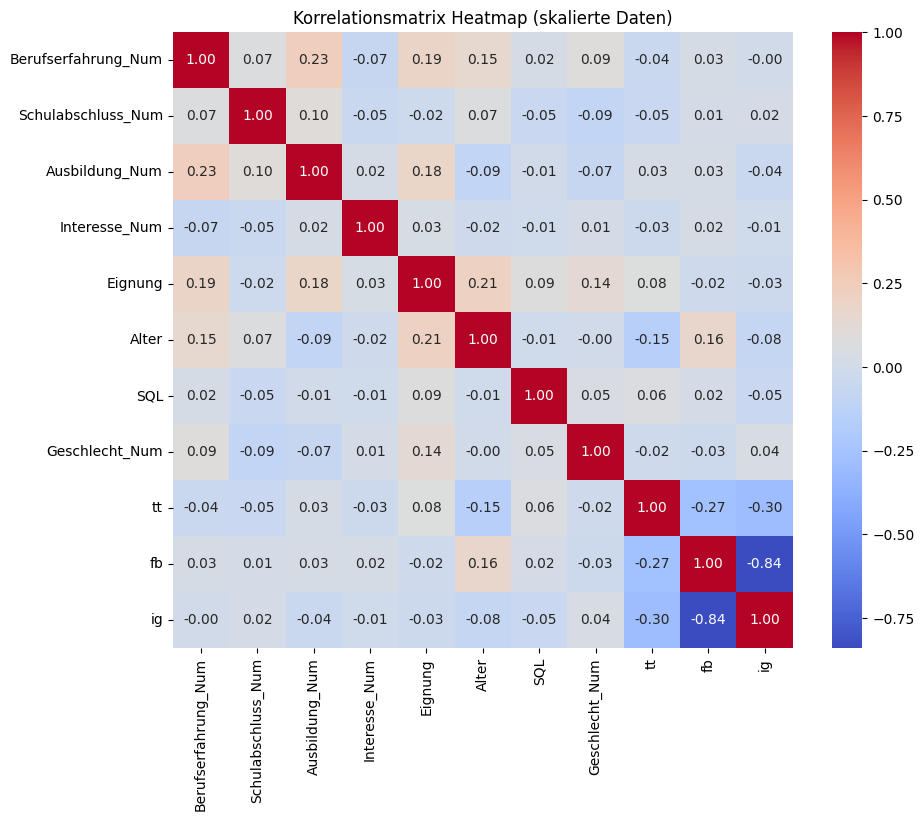

In [77]:
# Annahme: selected_features ist eine Liste von Spaltennamen
selected_features = ['Berufserfahrung_Num', 'Schulabschluss_Num', 'Ausbildung_Num', 'Interesse_Num','Eignung', 'Alter', 'SQL', 'Geschlecht_Num', 'tt', 'fb', 'ig']

# Erstellen Sie einen DataFrame mit den ausgewählten Features
selected_data = data[selected_features]

# Skalieren Sie die ausgewählten Features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)

# Berechnen Sie die Korrelationsmatrix auf den skalierten Daten
correlation_matrix = pd.DataFrame(scaled_data, columns=selected_features).corr()

# Erstellen Sie eine Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korrelationsmatrix Heatmap (skalierte Daten)')
plt.show()




Das einzige Ergbnis hier ist dass fb und ig hoch korrelieren. Daher kann ich auch ein rausnehmen. da es eh dummy variablen sind muss ich eh eins rausnehmen, um einen Vergleich aufzustellen.


## supervised learning 
### classification 
Es liegt ein Klassifikationsproblem vor, weil das label entweder eine 0 oder eine 1 ist. Somit liegen hier 2 Kategorien vor. 
In der Klassifikation werden Datenpunkte in vordefinierte Klassen oder Kategorien eingeteilt.


Problemstellung:

1.) Welche 3 Merkmale (features) sind ausschlaggebend, damit der Arbeitsvermittler den Bildungsgutschein erfolgreich (label) ausstellt? 

2.) Welche Merkmale führen zu einer Ablehnung seitens des Arbeitsvermittlers? (Diese Fragestellung wird hier nicht beantwortet aufgrund zeitlicher Aspekte)

##### features

In [78]:
# Eines der Dummy Variablen muss man rausnehmen für die Interpreation der Ergebnisse. 
# Ich habe mich für ig entschieden, weil es stark mit facebook korreliert und daher die selbe Information enthält.
selected_features = ['Berufserfahrung_Num', 'Schulabschluss_Num', 'Ausbildung_Num', 'Interesse_Num','Eignung', 'Alter', 'SQL', 'Geschlecht_Num', 'tt', 'fb']  

##### label distribution

In [79]:
data['Erfolgreich abgeschlossen'].value_counts()

Erfolgreich abgeschlossen
0    1036
1      22
Name: count, dtype: int64

In [107]:
data['AV hat abgelehnt'].value_counts()

AV hat abgelehnt
0    988
1     70
Name: count, dtype: int64

##### definition of features and label 

In [80]:
#Definieren der Modellvariablen
X = data[selected_features]  # Features
y = data['Erfolgreich abgeschlossen']  # Label

##### feature scaling using minmax-scaler, since most features are 0 and 1 and minmax also scales between zero and one

In [81]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

##### splitting into train and testdata applying stratify due to the uneven distribution of y

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

#### logistic regression 

Die logistische Regression ist ein Klassifikationsmodell. Ihr Hauptzweck besteht darin, Klassifikationsaufgaben durchzuführen, bei denen es darum geht, Beobachtungen in Klassen oder Kategorien einzuteilen, basierend auf einer Reihe von Eingangsmerkmalen. 
In der logistischen Regression wird die Wahrscheinlichkeit berechnet, dass eine Beobachtung zu einer bestimmten Klasse gehört, und diese Wahrscheinlichkeit wird dann verwendet, um eine binäre oder mehrklassige Klassifikation durchzuführen.
Die logistische Regression ist speziell für Klassifikationsaufgaben geeignet, insbesondere für binäre Klassifikation, bei der es darum geht, zwischen zwei Klassen zu unterscheiden (z. B. Ja/Nein, 0/1).

In [98]:
# Erstellen des Logistischen Regressionsmodells
model_lr = LogisticRegression()

# Erstellen des RFE-Selektors und Auswahl von 3 Features
num_features_to_select = 3  
rfe_selector = RFE(estimator=model_lr, n_features_to_select=num_features_to_select)

# Trainieren des Modells mit allen Features
model_lr.fit(X=X_train, y=y_train)

# Wenden Sie RFE auf Ihre Daten an, um die wichtigen Features auszuwählen,
# basierend auf den Ergebnissen des Modells.
rfe_selector.fit(X=X_train, y=y_train)  

# Man kann die ausgewählten Features mithilfe der Methode "support_" des RFE-Selektors 
# abrufen, nachdem man "rfe_selector.fit" aufgerufen hat. 

print(rfe_selector.support_)
# Dies gibt ein Boolean-Array zurück, das angibt, welche Features ausgewählt wurden.

selected_features_RFE = X.columns[rfe_selector.support_]
selected_features_RFE



[False False  True False  True False False  True False False]


Index(['Ausbildung_Num', 'Eignung', 'Geschlecht_Num'], dtype='object')

**Koeffizienten-Interpretation:** Die Koeffizienten in einem logistischen Regressionsmodell zeigen an, wie sich eine Veränderung in den unabhängigen Variablen auf die logistische Wahrscheinlichkeit eines Ereignisses auswirkt. 

Hier sind die Interpretationen der Koeffizienten für Ihre spezifischen Merkmale:

**Eignung (-3.334):** Ein Anstieg um eine Einheit in der Eignung (z. B. von 80 auf 81) führt zu einer drastischen Abnahme der logistischen Wahrscheinlichkeit, dass die abhängige Variable der Klasse 1 angehört. Personen mit niedrigerer Eignung gehören viel wahrscheinlicher zur Klasse 1 als Personen mit höherer Eignung.

**Geschlecht_Num (-2.894):** Hierbei handelt es sich um eine Dummy-Variable, wobei 0 für weiblich und 1 für männlich steht. Ein Geschlechtswechsel von weiblich zu männlich (von 0 auf 1) führt zu einer Abnahme der logistischen Wahrscheinlichkeit, dass die abhängige Variable der Klasse 1 angehört. Männer sind weniger wahrscheinlich in Klasse 1 vertreten als Frauen.

**Ausbildung_Num (-1.435):** Ein Anstieg um eine Einheit in der Ausbildungskategorie (von 1 bis 6) führt zu einer Abnahme der logistischen Wahrscheinlichkeit, dass die abhängige Variable der Klasse 1 angehört. Je höher die Ausbildungskategorie, desto weniger wahrscheinlich ist es, dass die Beobachtung zur Klasse 1 gehört.


##### intercept and coefficients without RFE selector

In [88]:
# Koeffizienten
coefficients = model_lr.coef_[0]
intercept= model_lr.intercept_[0]

# Zuordnen der Koeffizienten zu den Feature-Namen
feature_names = X.columns
coefficients_dict = dict(zip(feature_names, coefficients))

# Ausgabe der Koeffizienten
print("Intercept:", intercept)
print("Koeffizienten:")
for feature, coef in coefficients_dict.items():
    print(f"{feature}: {coef}")


y_pred = model_lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Genauigkeit:", accuracy)

class_report = classification_report(y_test, y_pred)
print("Klassifikationsbericht:")
print(class_report)


Intercept: -0.09411110566740964
Koeffizienten:
Berufserfahrung_Num: -0.9998732923509002
Schulabschluss_Num: 0.32491416171191084
Ausbildung_Num: -1.4354552673879453
Interesse_Num: -0.5064573352347146
Eignung: -3.3339891830764548
Alter: 0.5565822643515113
SQL: -0.35290621539624917
Geschlecht_Num: -2.8940200294625744
tt: -0.6399284515840067
fb: 0.23452322505035655
Genauigkeit: 0.9811320754716981
Klassifikationsbericht:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       208
           1       0.00      0.00      0.00         4

    accuracy                           0.98       212
   macro avg       0.49      0.50      0.50       212
weighted avg       0.96      0.98      0.97       212



/Users/noraalmonajjed/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/noraalmonajjed/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/noraalmonajjed/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

#### decisicion tree classifier

In [84]:
#Modell aufstellen
model_tree = DecisionTreeClassifier()
#Modell trainieren
model_tree.fit(X=X_train, y=y_train)
#Modellgüte im Testdatensatz überprüfen
model_tree.score(X=X_test, y=y_test)
# Vorhersagen mit dem besten Modell auf den Testdaten machen
y_pred_tree = model_tree.predict(X_test)
# Evaluierung der Modellleistung auf den Testdaten
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'Accuracy des besten Modells auf den Testdaten: {accuracy_tree}')

Accuracy des besten Modells auf den Testdaten: 1.0


#### random forest classifier

In [85]:
#Modell aufstellen
model_rfc = RandomForestClassifier()
#Modell trainieren
model_rfc.fit(X=X_train, y=y_train)
#Modellgüte im Testdatensatz überprüfen
model_rfc.score(X=X_test, y=y_test)
# Vorhersagen mit dem besten Modell auf den Testdaten machen
y_pred_rfc = model_rfc.predict(X_test)
# Evaluierung der Modellleistung auf den Testdaten
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print(f'Accuracy des besten Modells auf den Testdaten: {accuracy_rfc}')

Accuracy des besten Modells auf den Testdaten: 1.0


#### support vector machines (SVM) 

In [86]:
model_svm = svm.SVC(kernel='linear')
model_svm.fit(X_train, y_train)
y_pred = model_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Genauigkeit: {accuracy}')


Genauigkeit: 0.9811320754716981


#### gradient boosting model


In [87]:
model_gb = xgb.XGBClassifier()
model_gb.fit(X_train, y_train)
y_pred = model_gb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Genauigkeit: {accuracy}')

Genauigkeit: 1.0
